<a href="https://colab.research.google.com/github/shahbashajahan/disease_predictionn/blob/main/desease_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [ ]:
import os # accessing directory structure
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!ls ../input/disease-prediction-using-machine-learning/

ls: cannot access '../input/disease-prediction-using-machine-learning/': No such file or directory


In [ ]:
# import data from Excel csv sheet
dftest = pd.read_csv('/content/Testing.csv')
dftrain = pd.read_csv('/content/Training.csv.zip')

# show first 5 records of training dataset
dftrain.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN  
2  Fungal infection           NaN  
3  Fungal infection           NaN  
4  Fungal infection           NaN  

[5 rows x 134 columns]

In [ ]:
# show first 5 records of test dataset
dftest.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze            prognosis  
0                  0     Fungal infection  
1                  0              Allergy  
2                  0                 GERD  
3                  0  Chronic cholestasis  
4                  0        Drug Reaction  

[5 rows x 133 columns]

In [ ]:
# return the object type, which is dataframe
print(type(dftrain), type(dftest))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
# identify null values
null_columns = dftrain.columns[dftrain.isnull().any()]
dftrain[null_columns].isnull().sum()

Unnamed: 133    4920
dtype: int64

In [ ]:
# drop 'Unnamed: 133'
dftrain.drop('Unnamed: 133', axis=1, inplace=True)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [ ]:
# identify null values
null_columns=dftest.columns[dftest.isnull().any()]
dftest[null_columns].isnull().sum()

Series([], dtype: float64)

<ipython-input-14-8e3de6d41d2d>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(2,2))


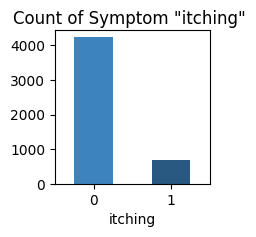

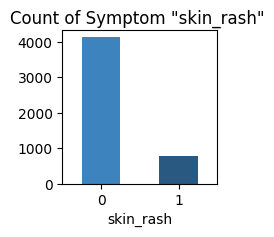

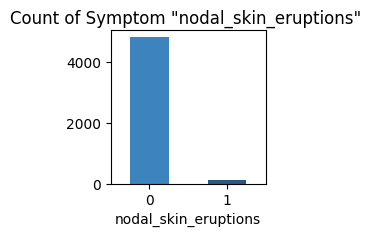

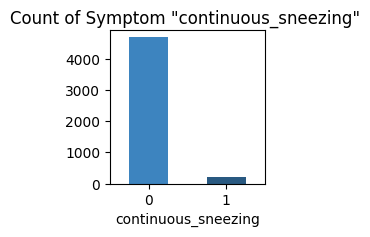

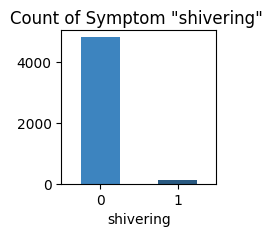

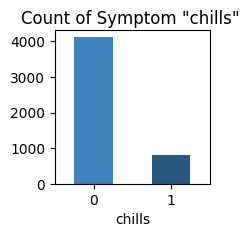

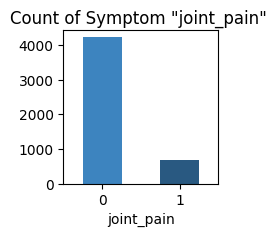

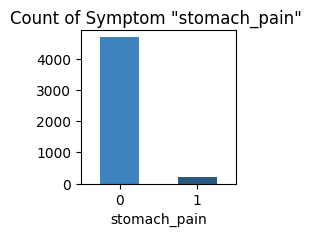

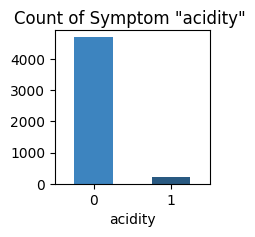

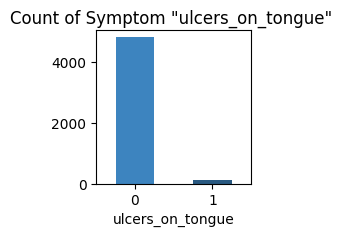

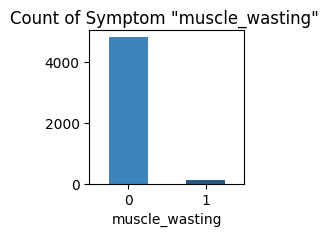

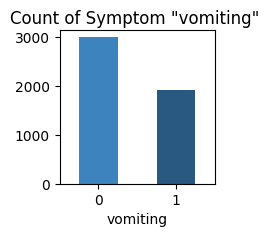

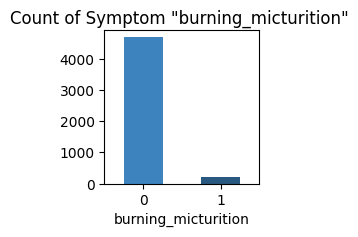

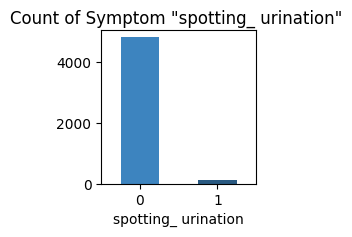

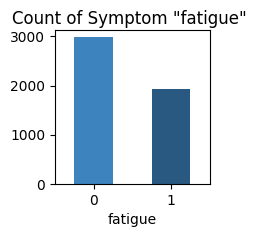

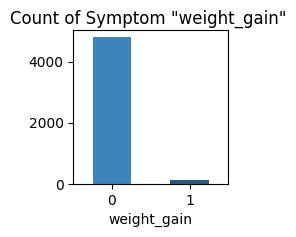

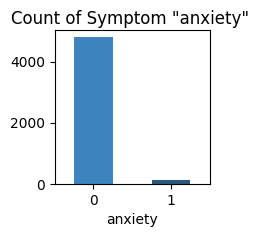

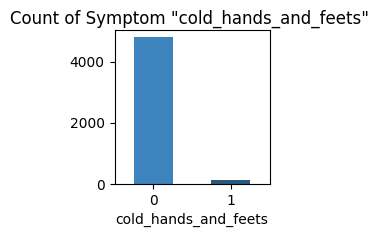

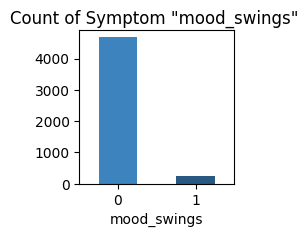

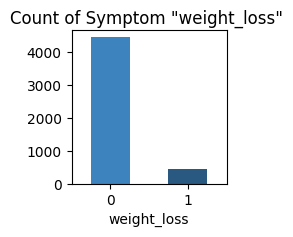

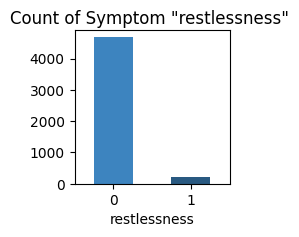

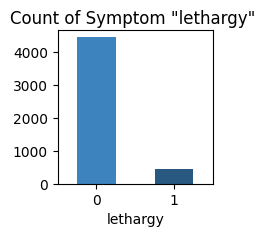

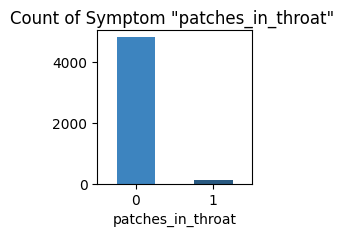

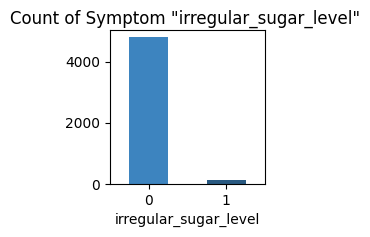

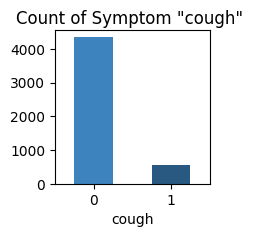

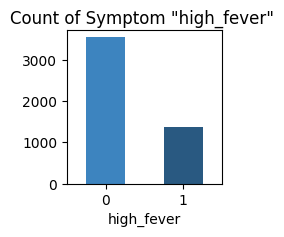

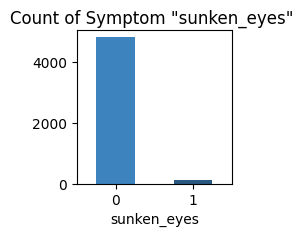

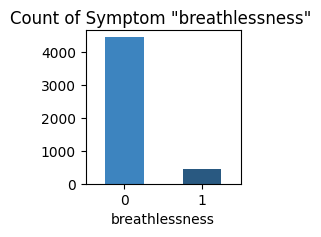

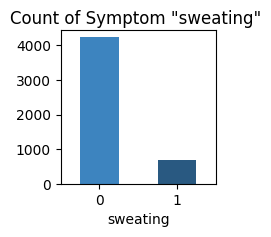

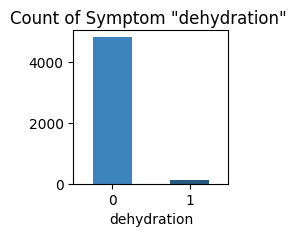

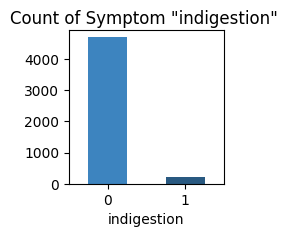

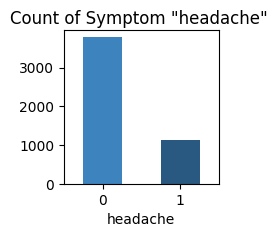

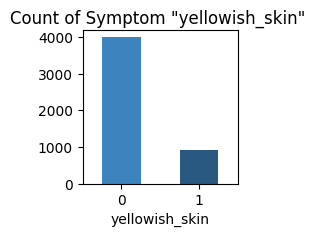

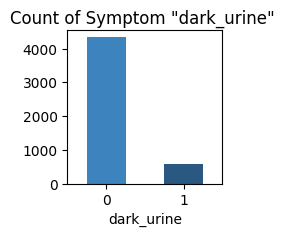

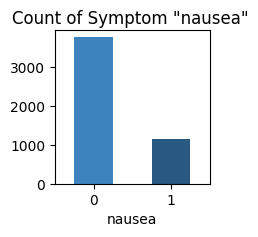

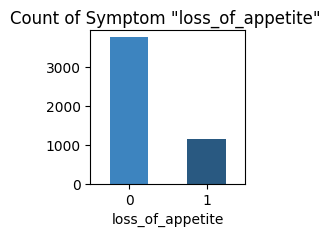

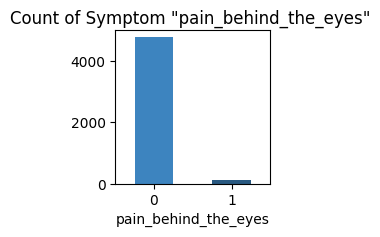

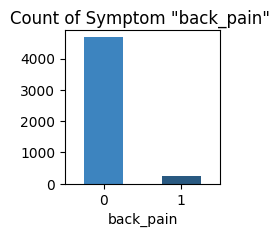

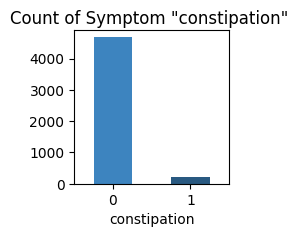

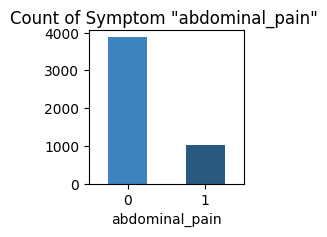

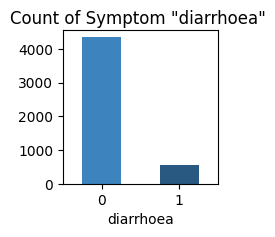

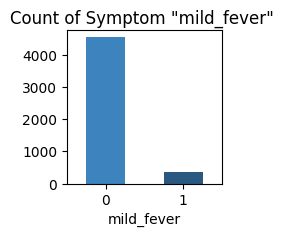

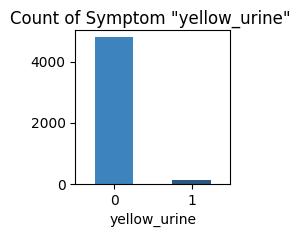

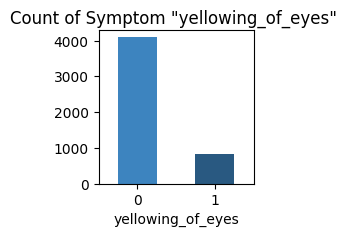

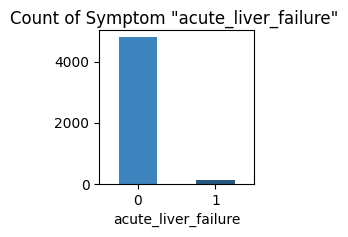

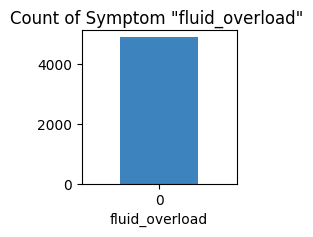

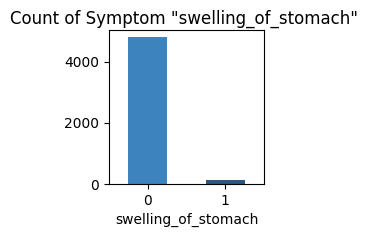

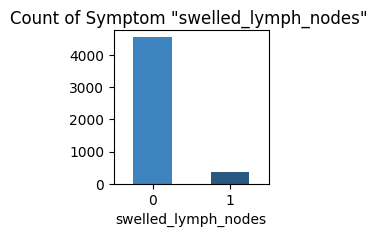

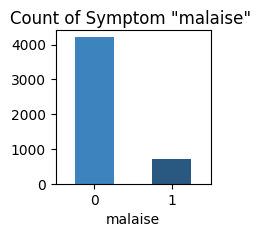

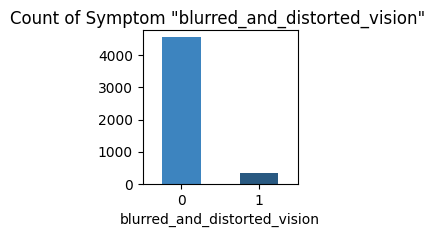

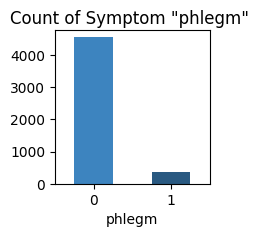

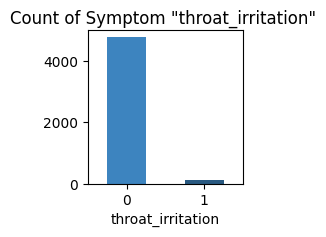

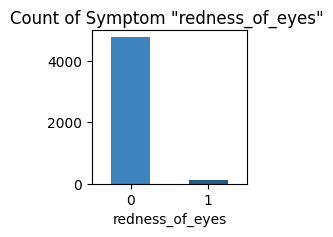

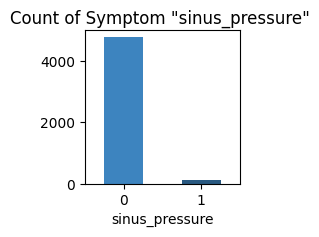

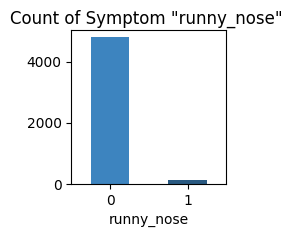

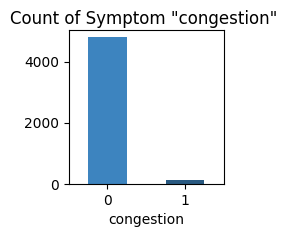

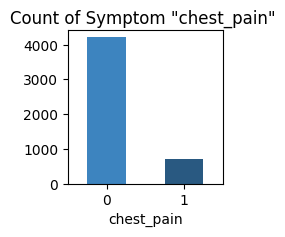

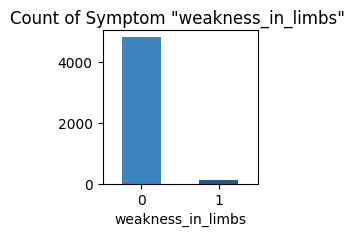

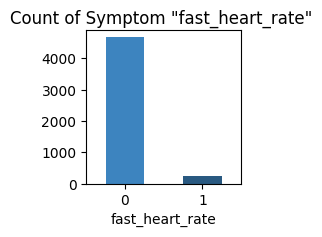

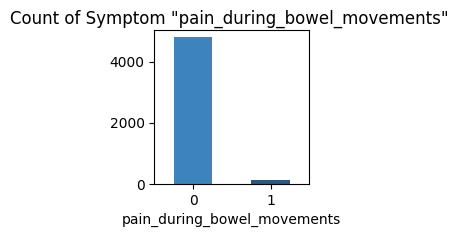

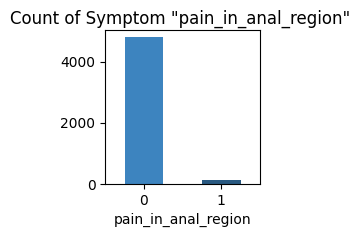

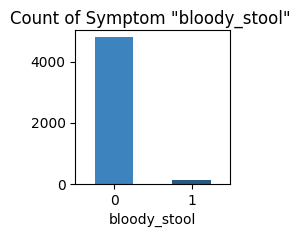

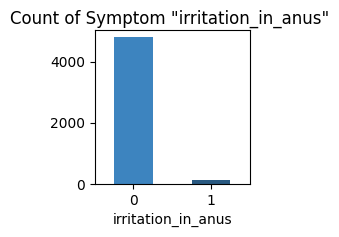

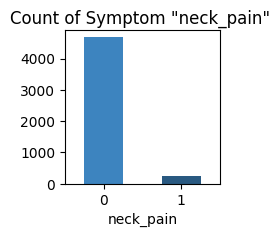

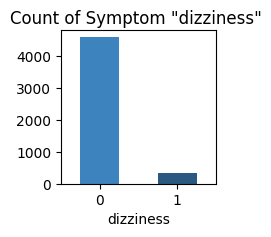

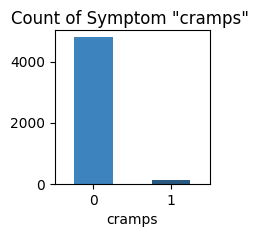

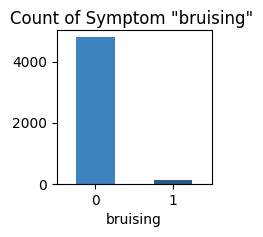

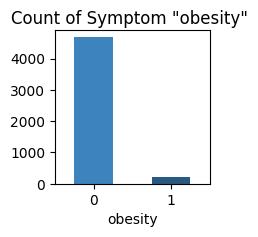

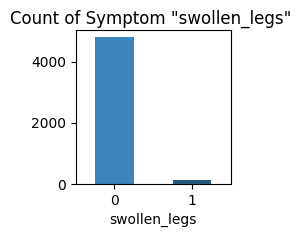

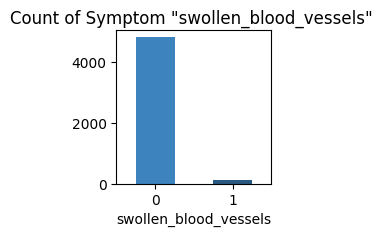

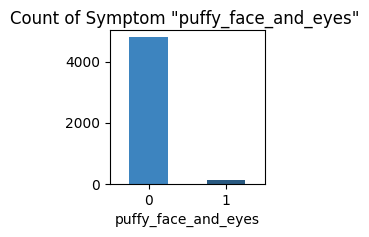

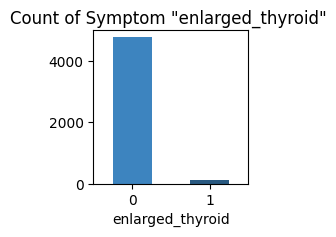

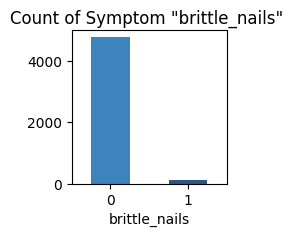

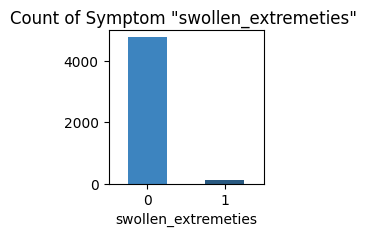

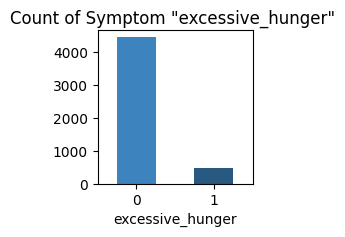

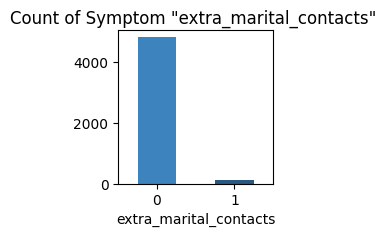

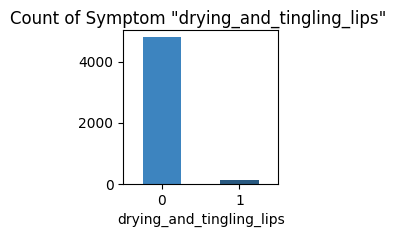

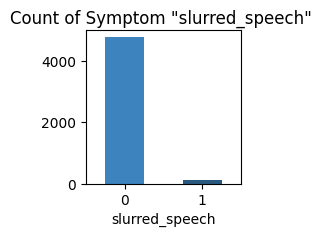

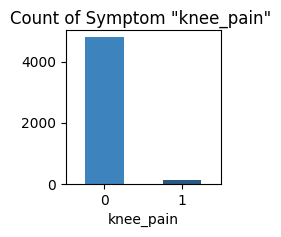

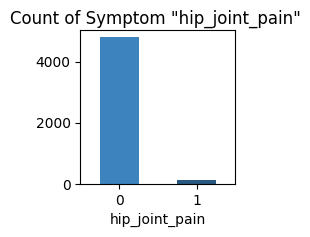

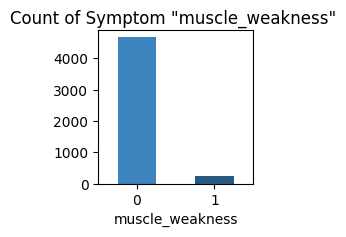

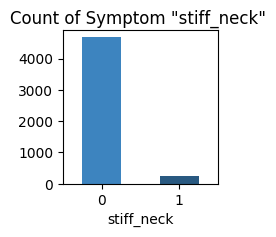

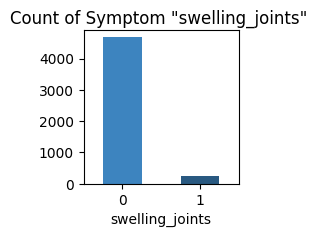

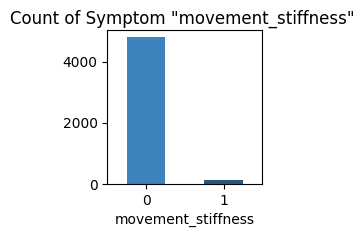

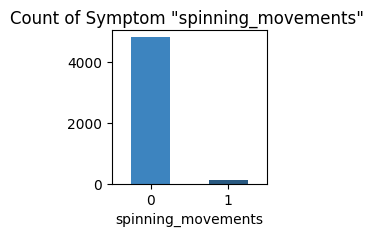

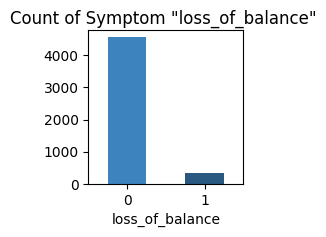

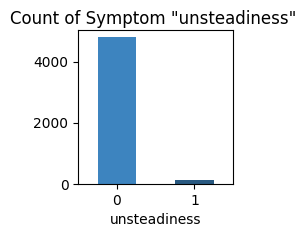

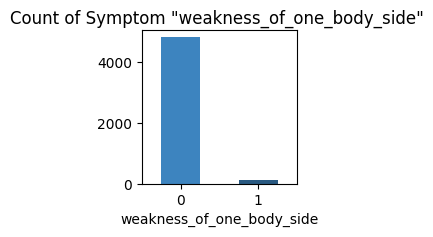

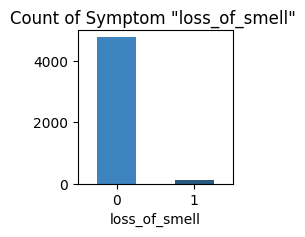

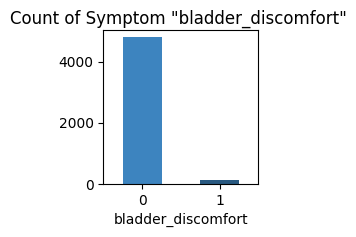

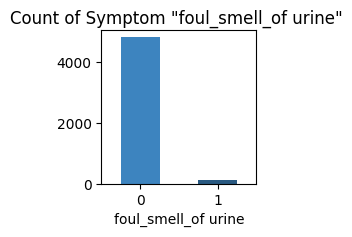

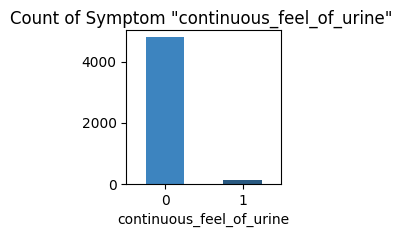

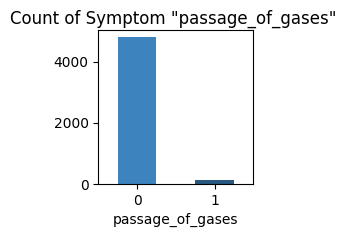

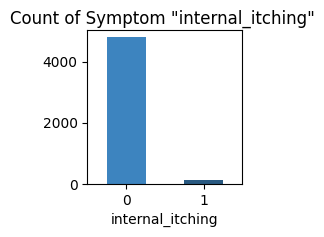

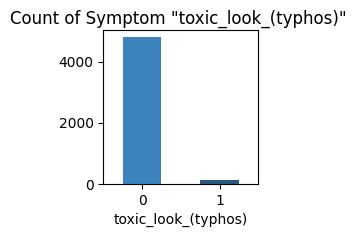

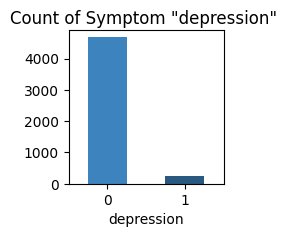

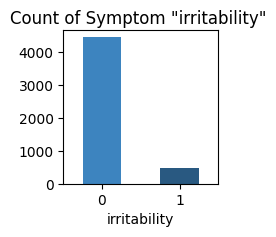

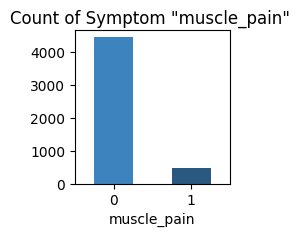

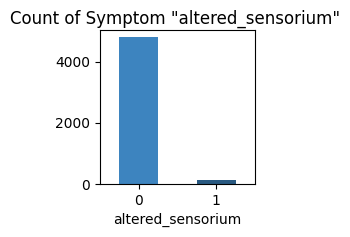

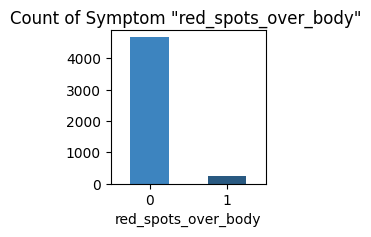

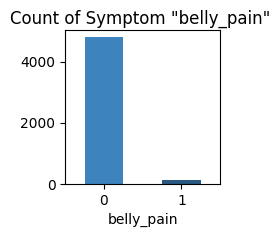

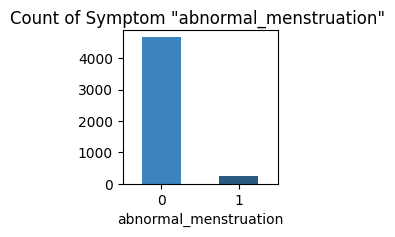

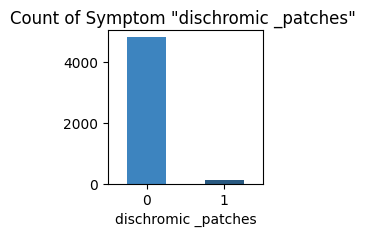

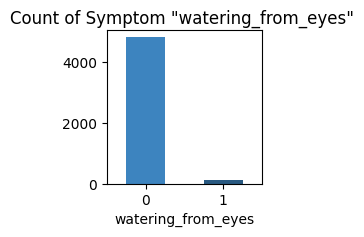

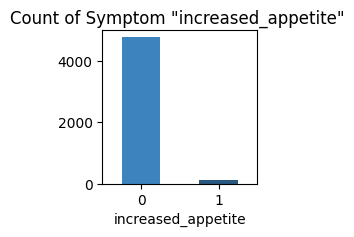

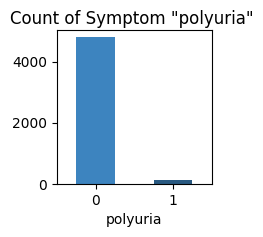

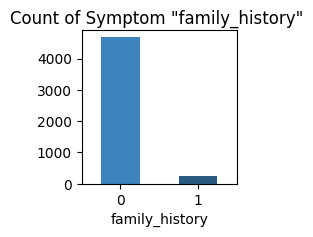

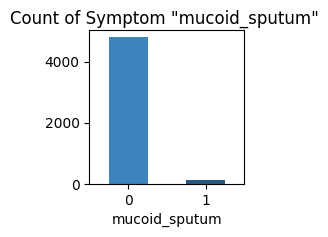

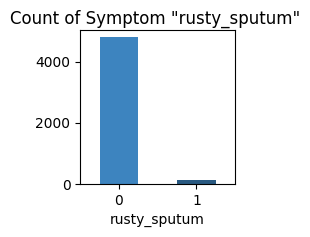

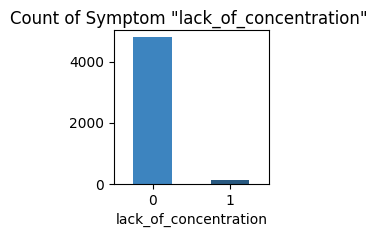

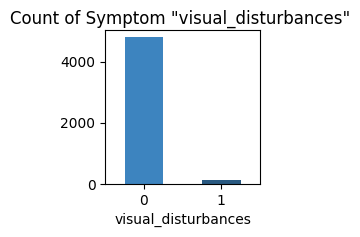

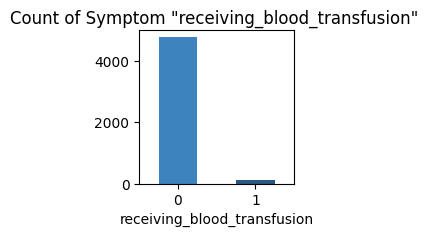

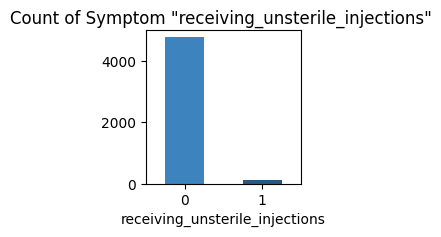

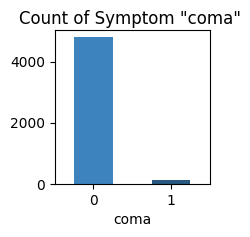

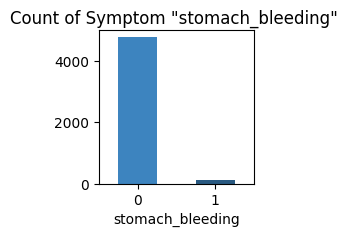

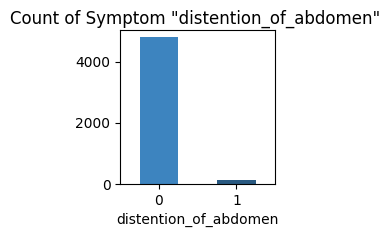

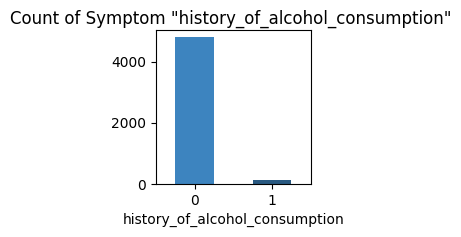

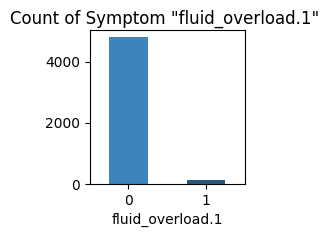

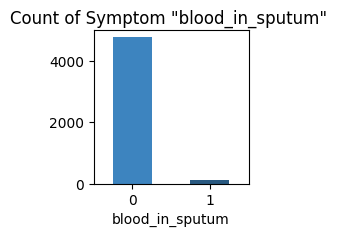

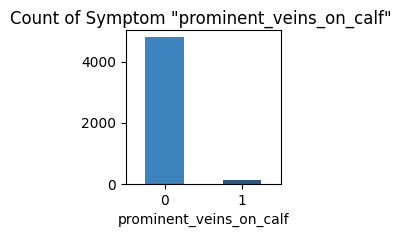

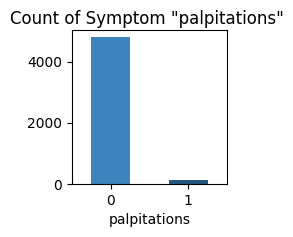

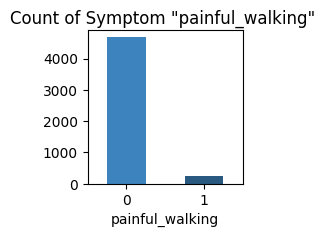

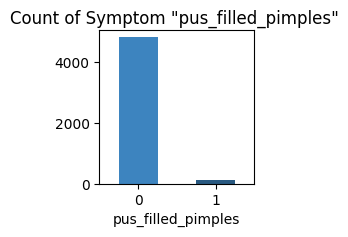

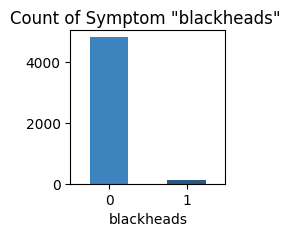

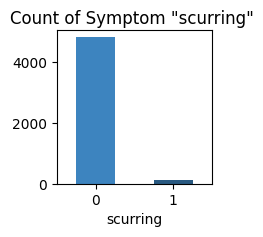

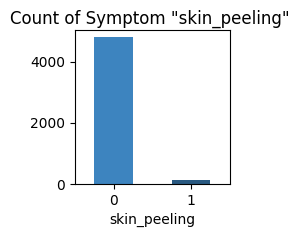

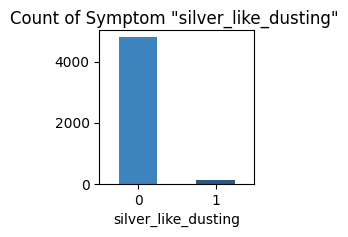

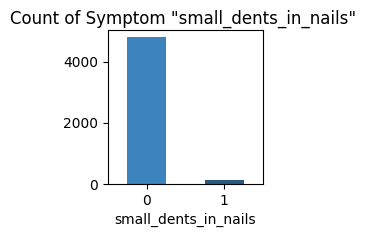

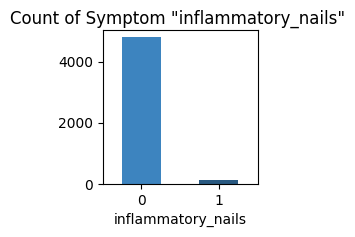

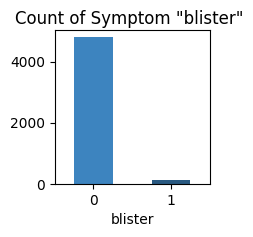

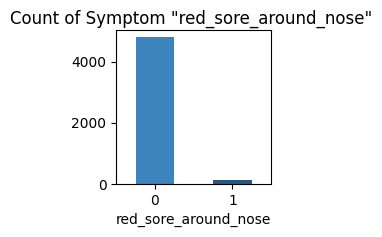

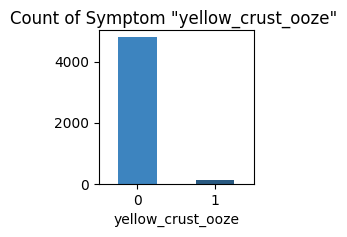

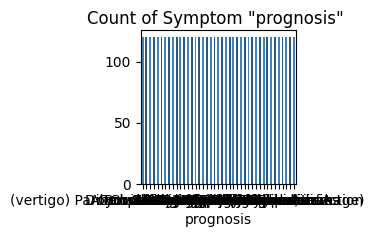

In [ ]:
colors = ['#3d84bf', '#295981']
columns = list(dftrain.columns)
# barplot of the count for all symptoms' absence and presence
for i in columns :
    fig, ax = plt.subplots(figsize=(2,2))
    bar = dftrain.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")

<ipython-input-15-07defb87fef2>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(2,2))


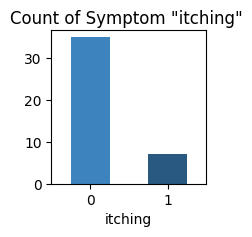

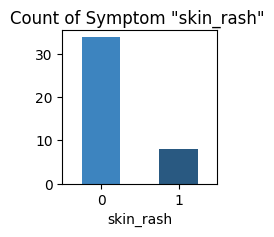

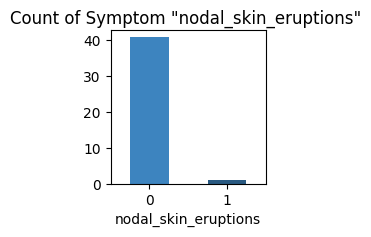

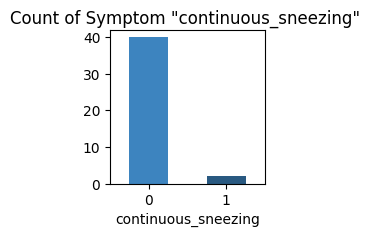

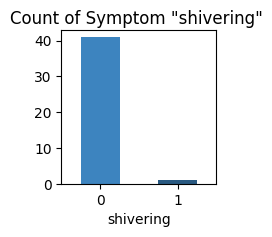

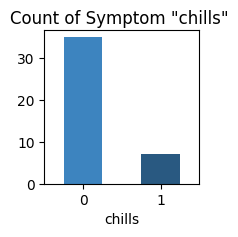

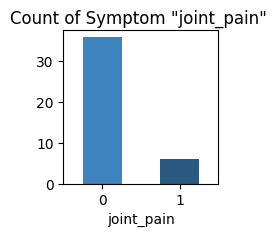

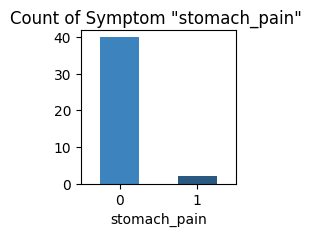

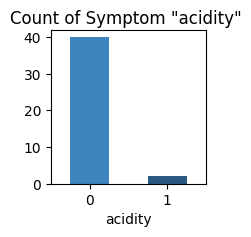

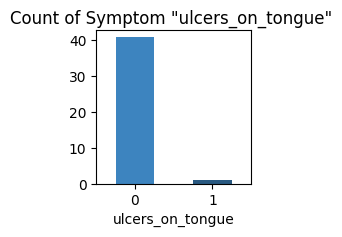

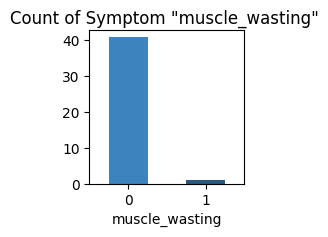

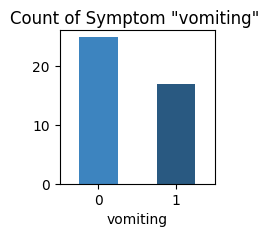

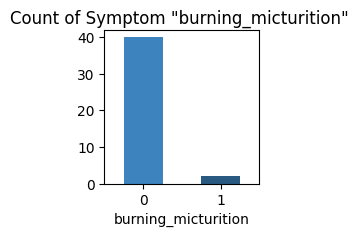

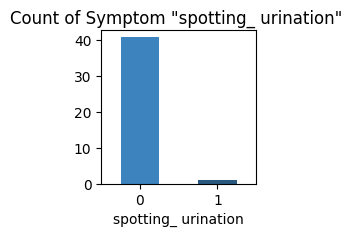

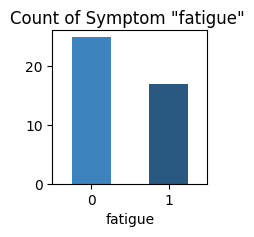

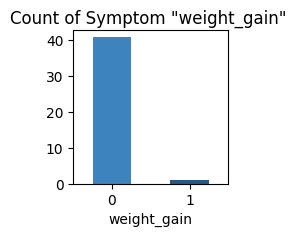

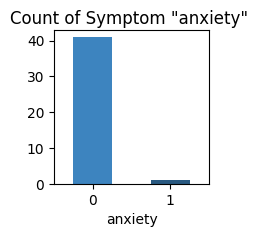

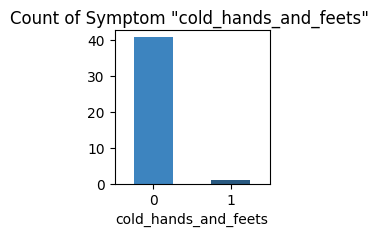

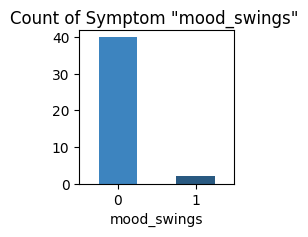

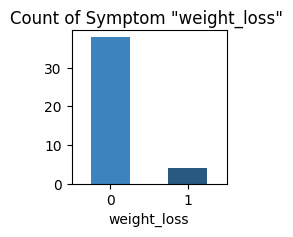

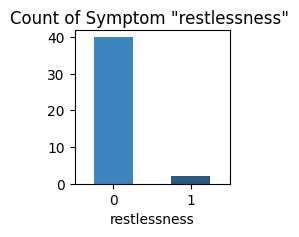

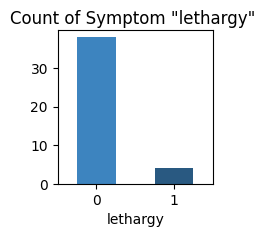

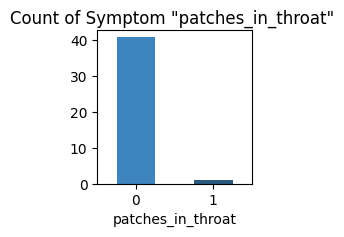

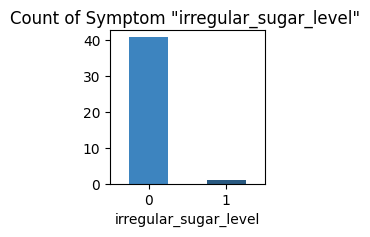

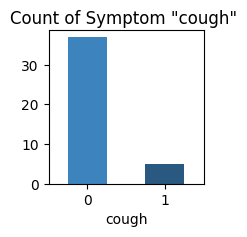

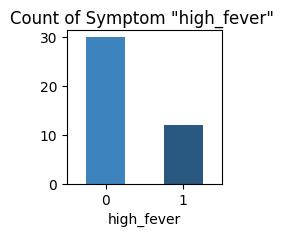

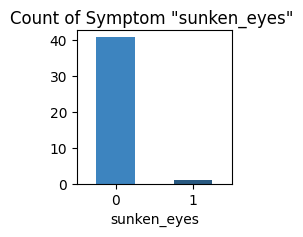

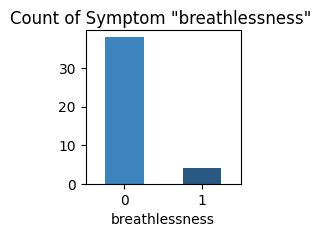

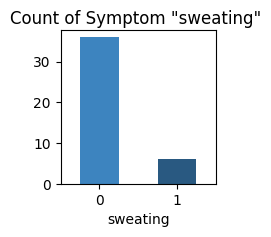

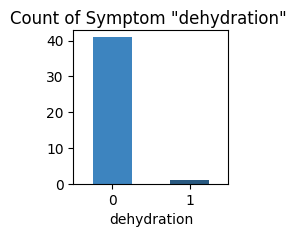

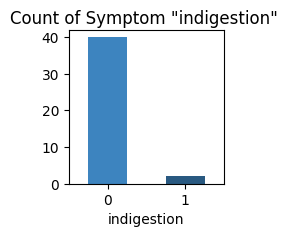

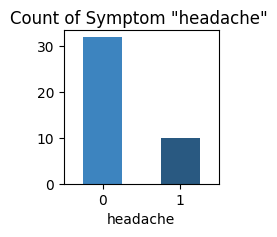

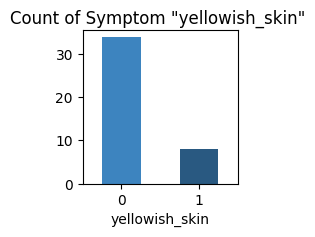

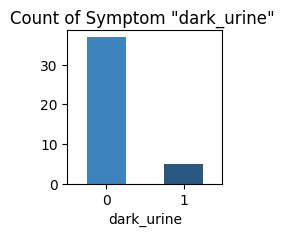

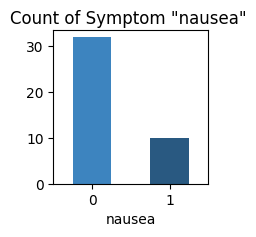

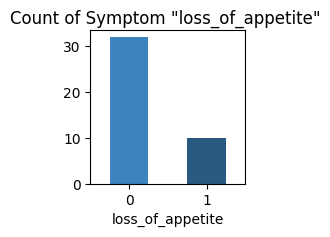

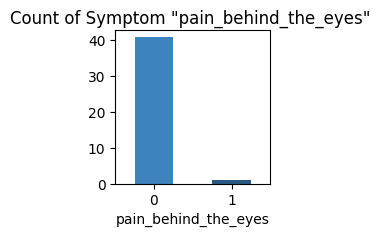

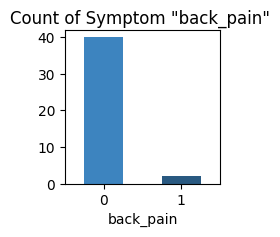

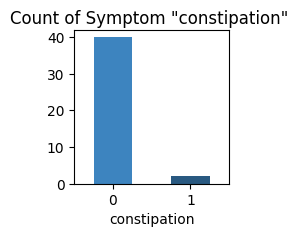

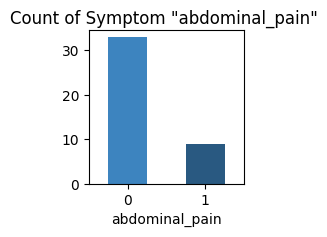

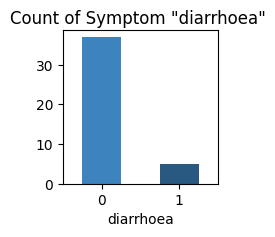

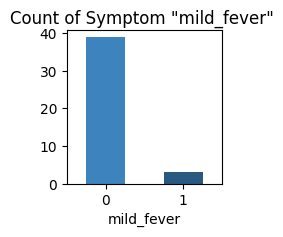

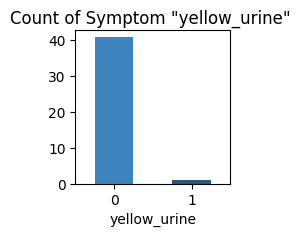

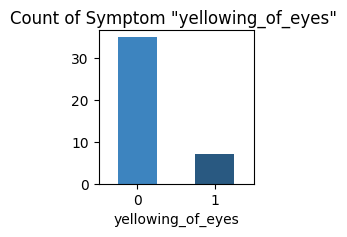

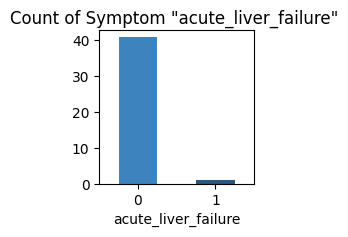

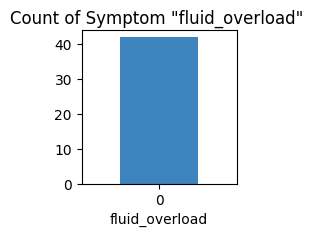

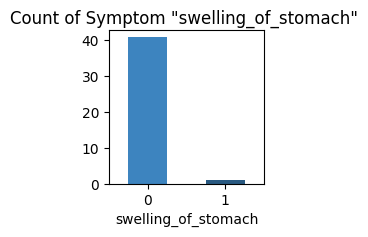

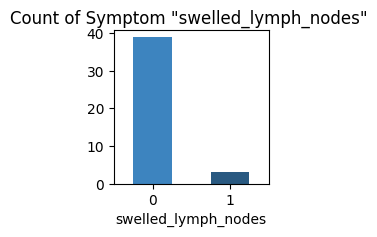

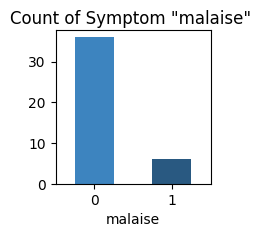

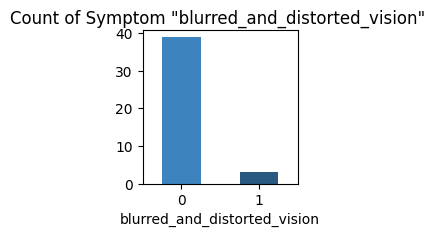

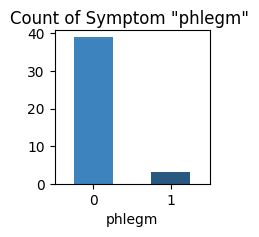

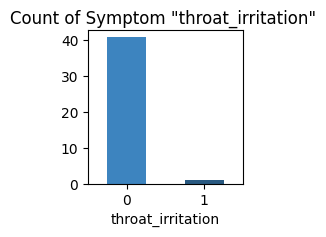

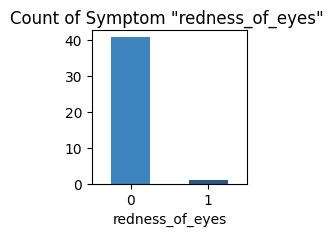

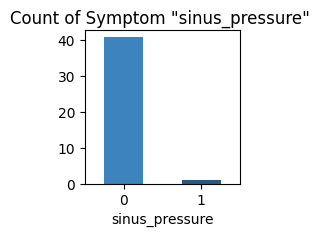

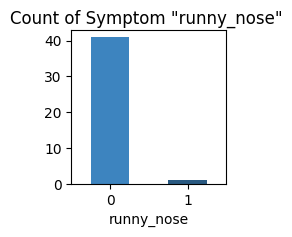

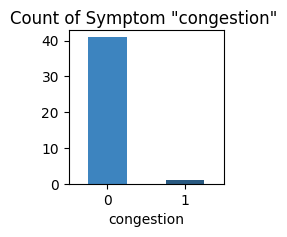

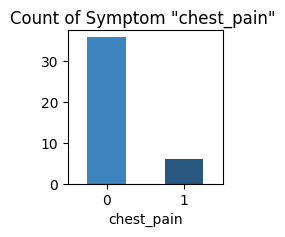

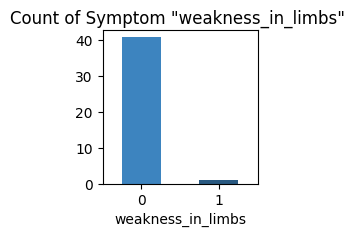

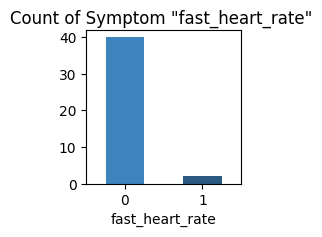

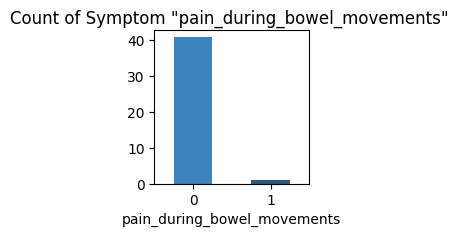

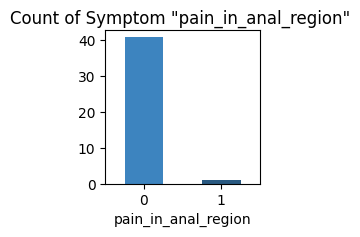

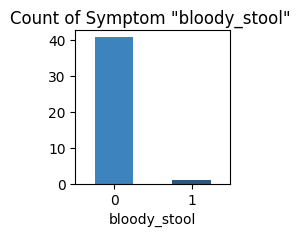

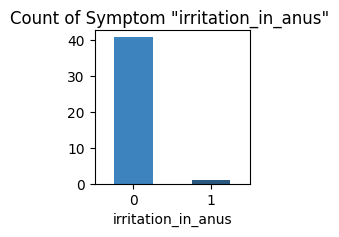

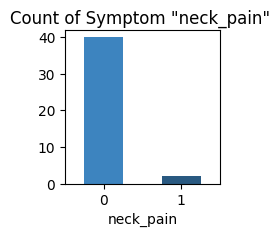

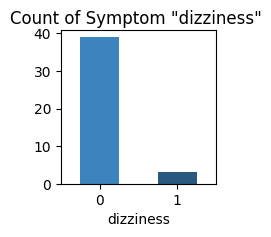

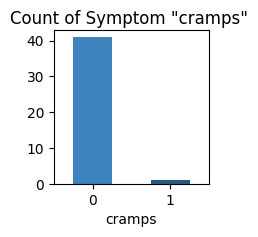

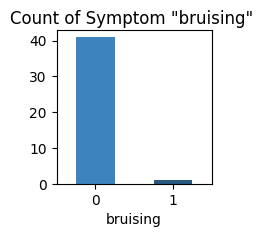

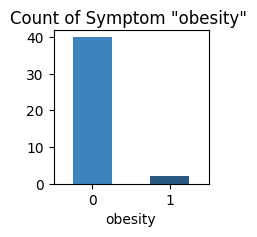

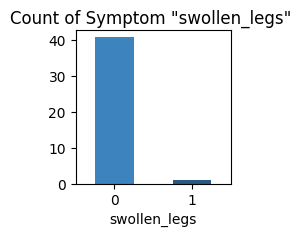

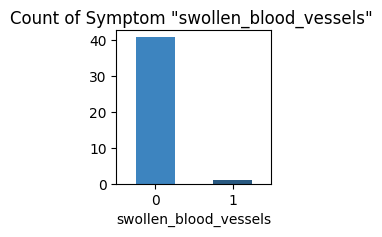

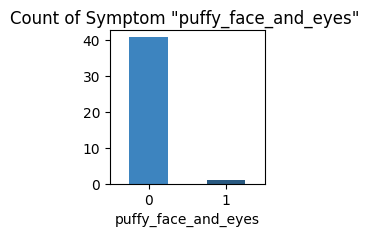

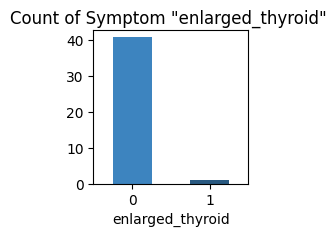

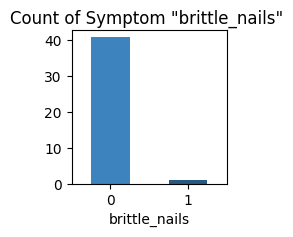

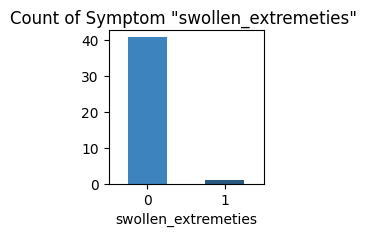

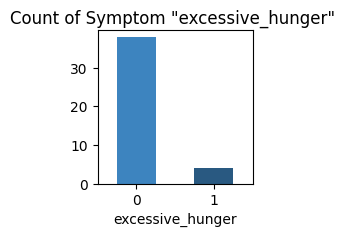

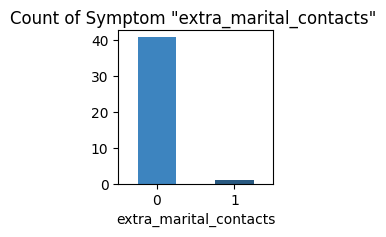

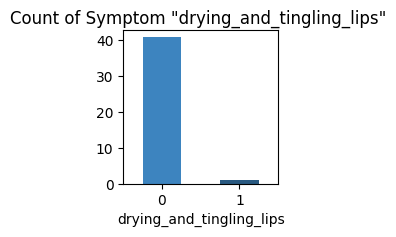

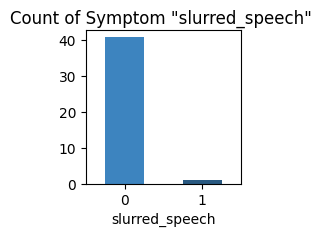

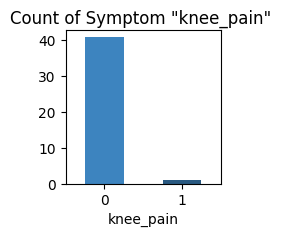

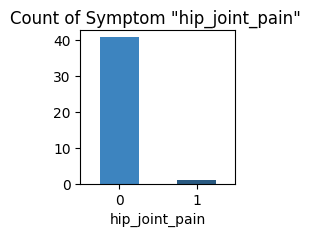

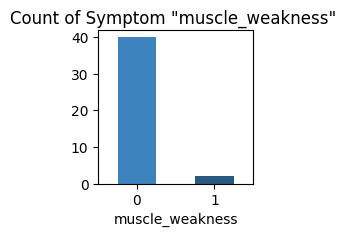

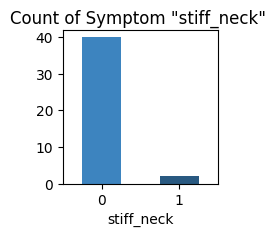

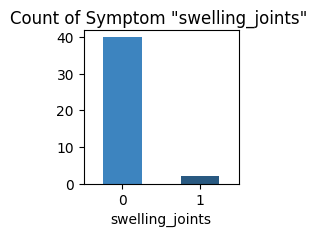

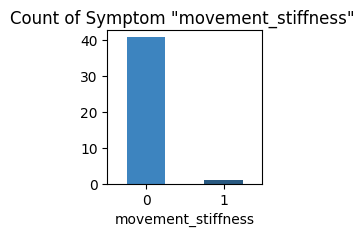

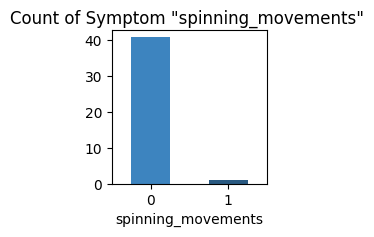

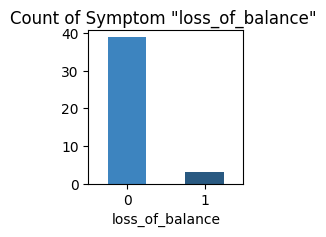

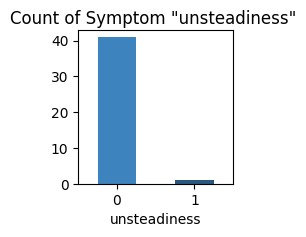

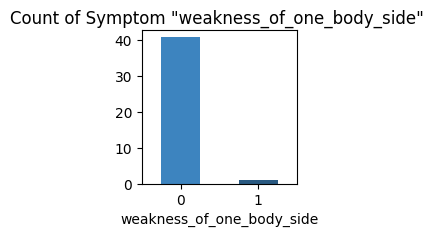

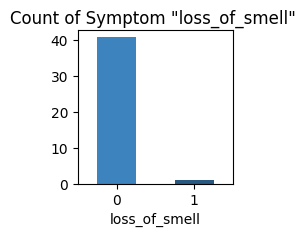

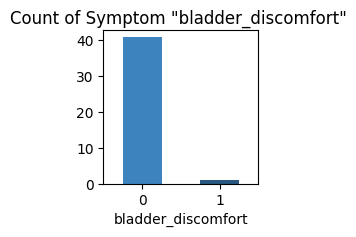

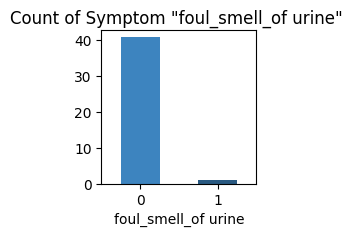

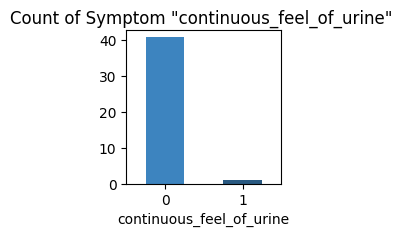

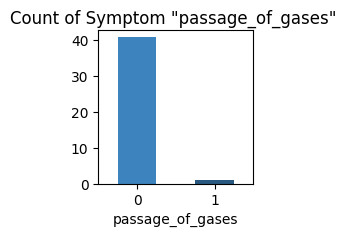

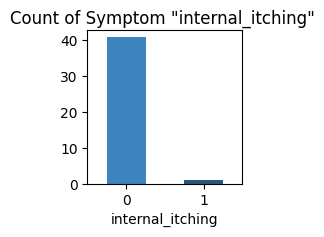

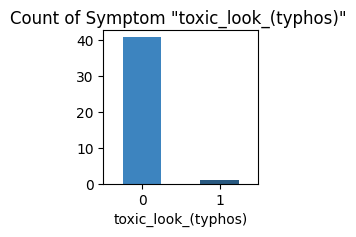

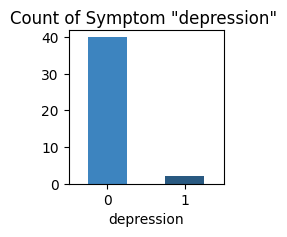

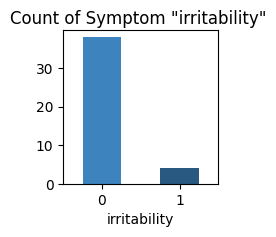

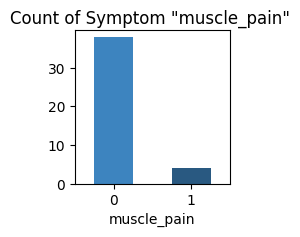

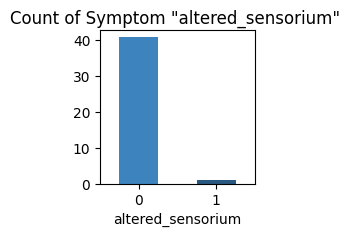

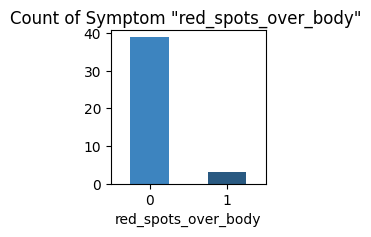

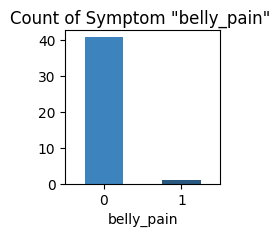

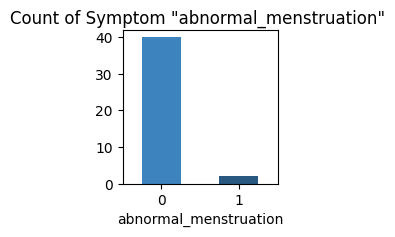

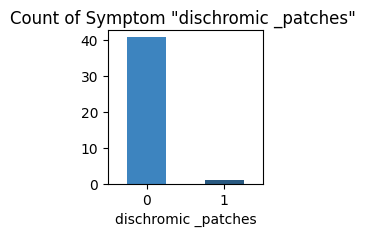

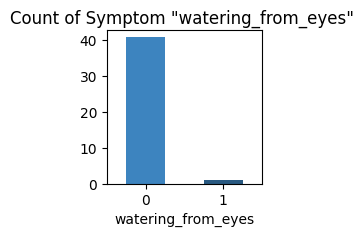

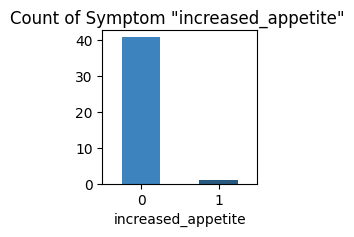

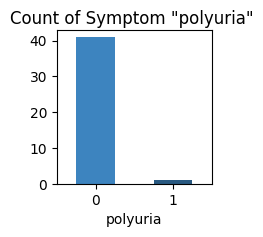

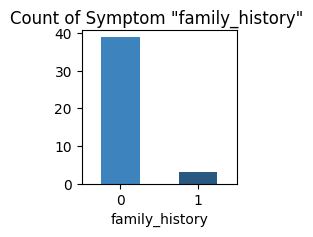

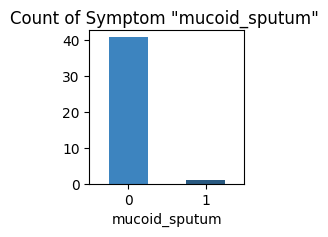

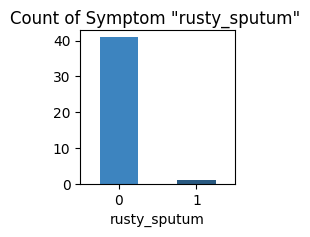

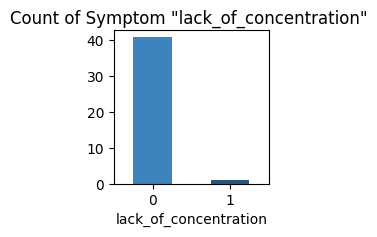

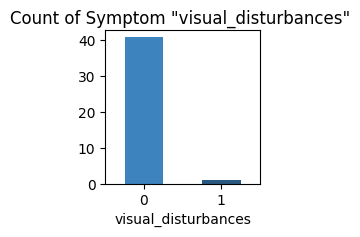

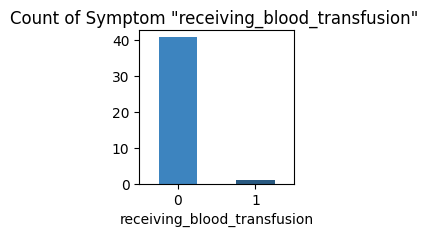

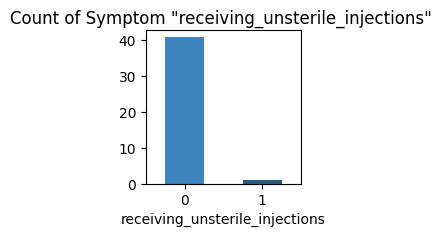

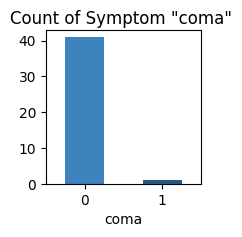

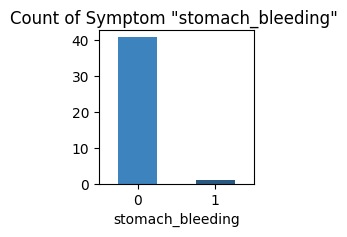

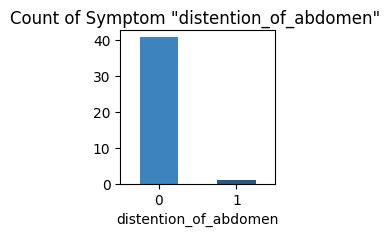

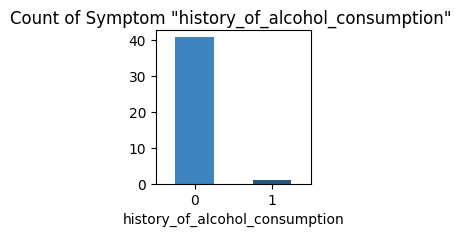

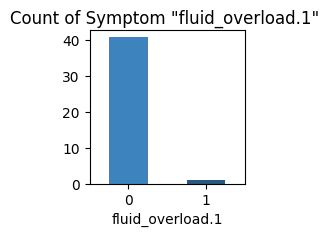

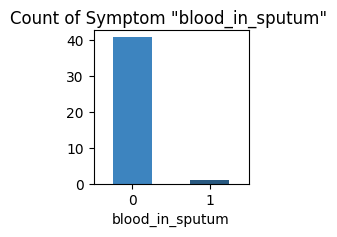

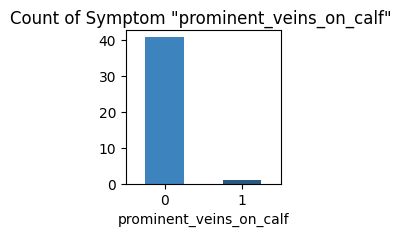

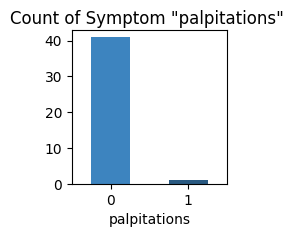

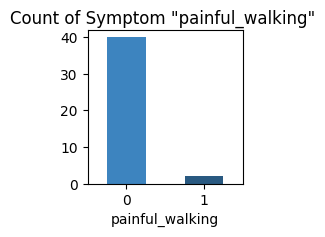

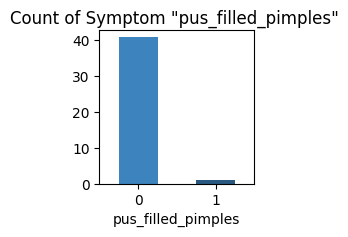

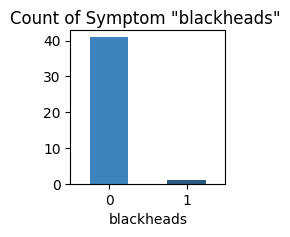

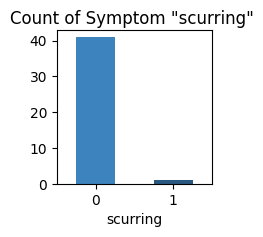

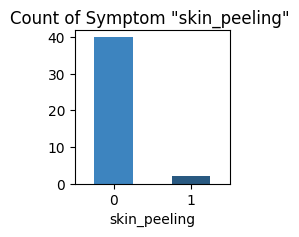

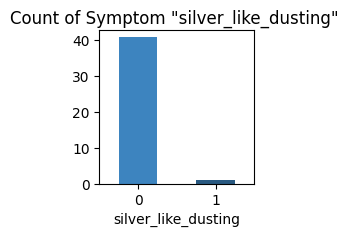

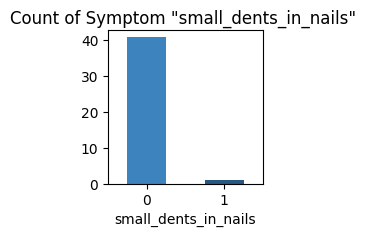

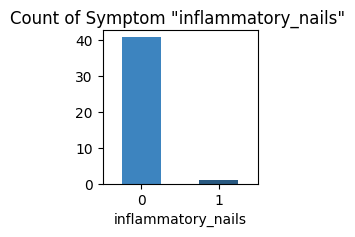

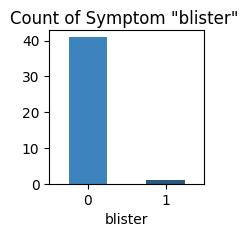

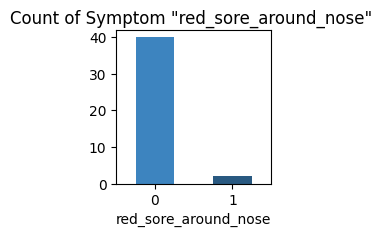

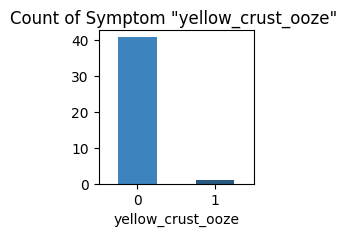

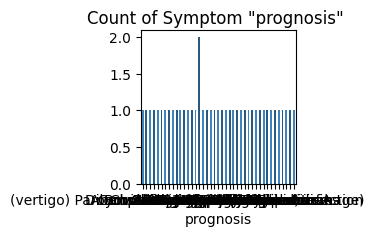

In [ ]:
colors = ['#3d84bf', '#295981']
# barplot of the count for all symptoms' absence and presence
for i in columns :
    fig, ax = plt.subplots(figsize=(2,2))
    bar = dftest.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")

In [ ]:
# all symptoms, sorted alphabetically
sorted(dftrain.prognosis.unique())

['(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Chronic cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes ',
 'Dimorphic hemmorhoids(piles)',
 'Drug Reaction',
 'Fungal infection',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'hepatitis A']

In [ ]:
# detect duplicated records
dftest[dftest.duplicated(subset = None, keep = False)]

Empty DataFrame
Columns: [itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills, joint_pain, stomach_pain, acidity, ulcers_on_tongue, muscle_wasting, vomiting, burning_micturition, spotting_ urination, fatigue, weight_gain, anxiety, cold_hands_and_feets, mood_swings, weight_loss, restlessness, lethargy, patches_in_throat, irregular_sugar_level, cough, high_fever, sunken_eyes, breathlessness, sweating, dehydration, indigestion, headache, yellowish_skin, dark_urine, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, constipation, abdominal_pain, diarrhoea, mild_fever, yellow_urine, yellowing_of_eyes, acute_liver_failure, fluid_overload, swelling_of_stomach, swelled_lymph_nodes, malaise, blurred_and_distorted_vision, phlegm, throat_irritation, redness_of_eyes, sinus_pressure, runny_nose, congestion, chest_pain, weakness_in_limbs, fast_heart_rate, pain_during_bowel_movements, pain_in_anal_region, bloody_stool, irritation_in_anus, neck_pain, dizziness, cramps, bruising, obesity, swollen_legs, swollen_blood_vessels, puffy_face_and_eyes, enlarged_thyroid, brittle_nails, swollen_extremeties, excessive_hunger, extra_marital_contacts, drying_and_tingling_lips, slurred_speech, knee_pain, hip_joint_pain, muscle_weakness, stiff_neck, swelling_joints, movement_stiffness, spinning_movements, loss_of_balance, unsteadiness, weakness_of_one_body_side, loss_of_smell, bladder_discomfort, foul_smell_of urine, continuous_feel_of_urine, passage_of_gases, internal_itching, toxic_look_(typhos), depression, irritability, muscle_pain, altered_sensorium, red_spots_over_body, ...]
Index: []

[0 rows x 133 columns]

In [ ]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [ ]:
# list and count the target class label names and their frequency
from collections import Counter
count = Counter(dftrain['prognosis'])
count.items()

dict_items([('Fungal infection', 120), ('Allergy', 120), ('GERD', 120), ('Chronic cholestasis', 120), ('Drug Reaction', 120), ('Peptic ulcer diseae', 120), ('AIDS', 120), ('Diabetes ', 120), ('Gastroenteritis', 120), ('Bronchial Asthma', 120), ('Hypertension ', 120), ('Migraine', 120), ('Cervical spondylosis', 120), ('Paralysis (brain hemorrhage)', 120), ('Jaundice', 120), ('Malaria', 120), ('Chicken pox', 120), ('Dengue', 120), ('Typhoid', 120), ('hepatitis A', 120), ('Hepatitis B', 120), ('Hepatitis C', 120), ('Hepatitis D', 120), ('Hepatitis E', 120), ('Alcoholic hepatitis', 120), ('Tuberculosis', 120), ('Common Cold', 120), ('Pneumonia', 120), ('Dimorphic hemmorhoids(piles)', 120), ('Heart attack', 120), ('Varicose veins', 120), ('Hypothyroidism', 120), ('Hyperthyroidism', 120), ('Hypoglycemia', 120), ('Osteoarthristis', 120), ('Arthritis', 120), ('(vertigo) Paroymsal  Positional Vertigo', 120), ('Acne', 120), ('Urinary tract infection', 120), ('Psoriasis', 120), ('Impetigo', 120)]

<ipython-input-31-4673c81dfe24>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(dftrain['prognosis'], palette = 'PuBu')
<ipython-input-31-4673c81dfe24>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")


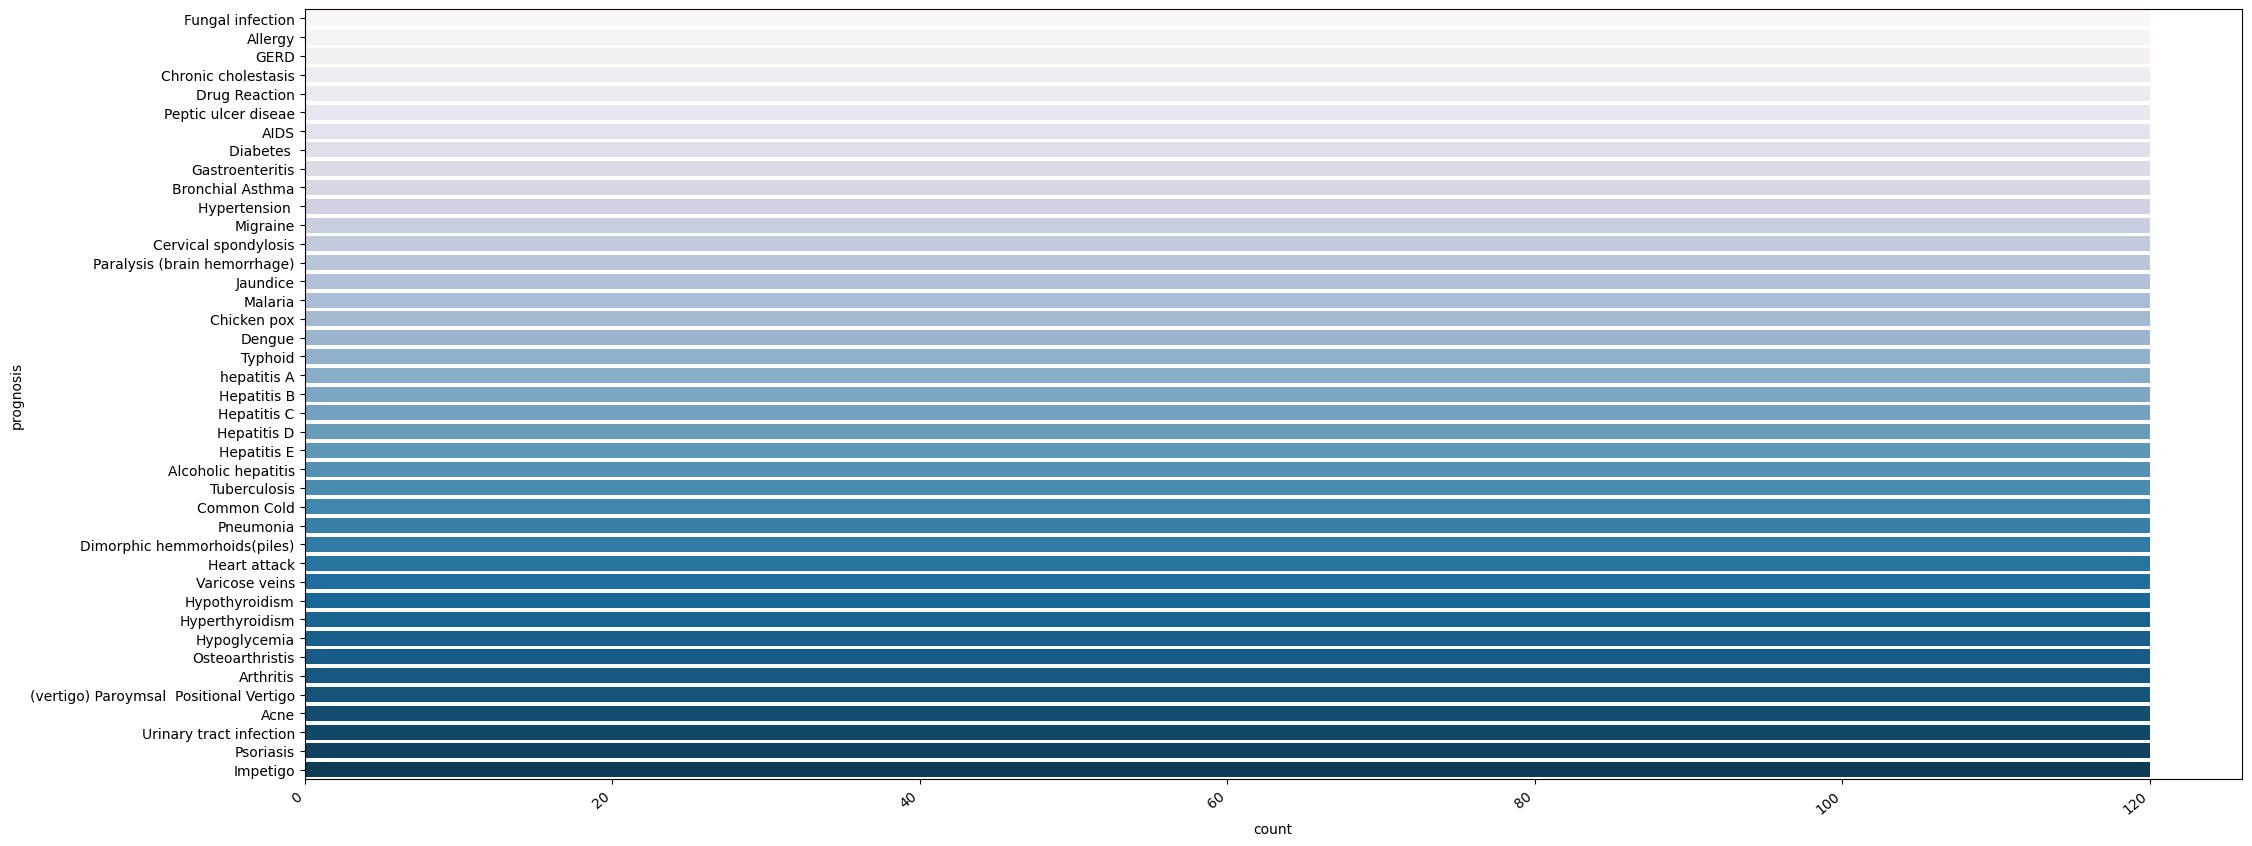

In [ ]:
import seaborn as sns
# count of each target class label
plt.figure(figsize = (25, 10))
ax = sns.countplot(dftrain['prognosis'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

In [ ]:
# list and count the target class label names and their frequency
count = Counter(dftest['prognosis'])
count.items()

dict_items([('Fungal infection', 2), ('Allergy', 1), ('GERD', 1), ('Chronic cholestasis', 1), ('Drug Reaction', 1), ('Peptic ulcer diseae', 1), ('AIDS', 1), ('Diabetes ', 1), ('Gastroenteritis', 1), ('Bronchial Asthma', 1), ('Hypertension ', 1), ('Migraine', 1), ('Cervical spondylosis', 1), ('Paralysis (brain hemorrhage)', 1), ('Jaundice', 1), ('Malaria', 1), ('Chicken pox', 1), ('Dengue', 1), ('Typhoid', 1), ('hepatitis A', 1), ('Hepatitis B', 1), ('Hepatitis C', 1), ('Hepatitis D', 1), ('Hepatitis E', 1), ('Alcoholic hepatitis', 1), ('Tuberculosis', 1), ('Common Cold', 1), ('Pneumonia', 1), ('Dimorphic hemmorhoids(piles)', 1), ('Heart attack', 1), ('Varicose veins', 1), ('Hypothyroidism', 1), ('Hyperthyroidism', 1), ('Hypoglycemia', 1), ('Osteoarthristis', 1), ('Arthritis', 1), ('(vertigo) Paroymsal  Positional Vertigo', 1), ('Acne', 1), ('Urinary tract infection', 1), ('Psoriasis', 1), ('Impetigo', 1)])

<ipython-input-33-bf6f76b7f56f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(dftest['prognosis'], palette = 'PuBu')
<ipython-input-33-bf6f76b7f56f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")


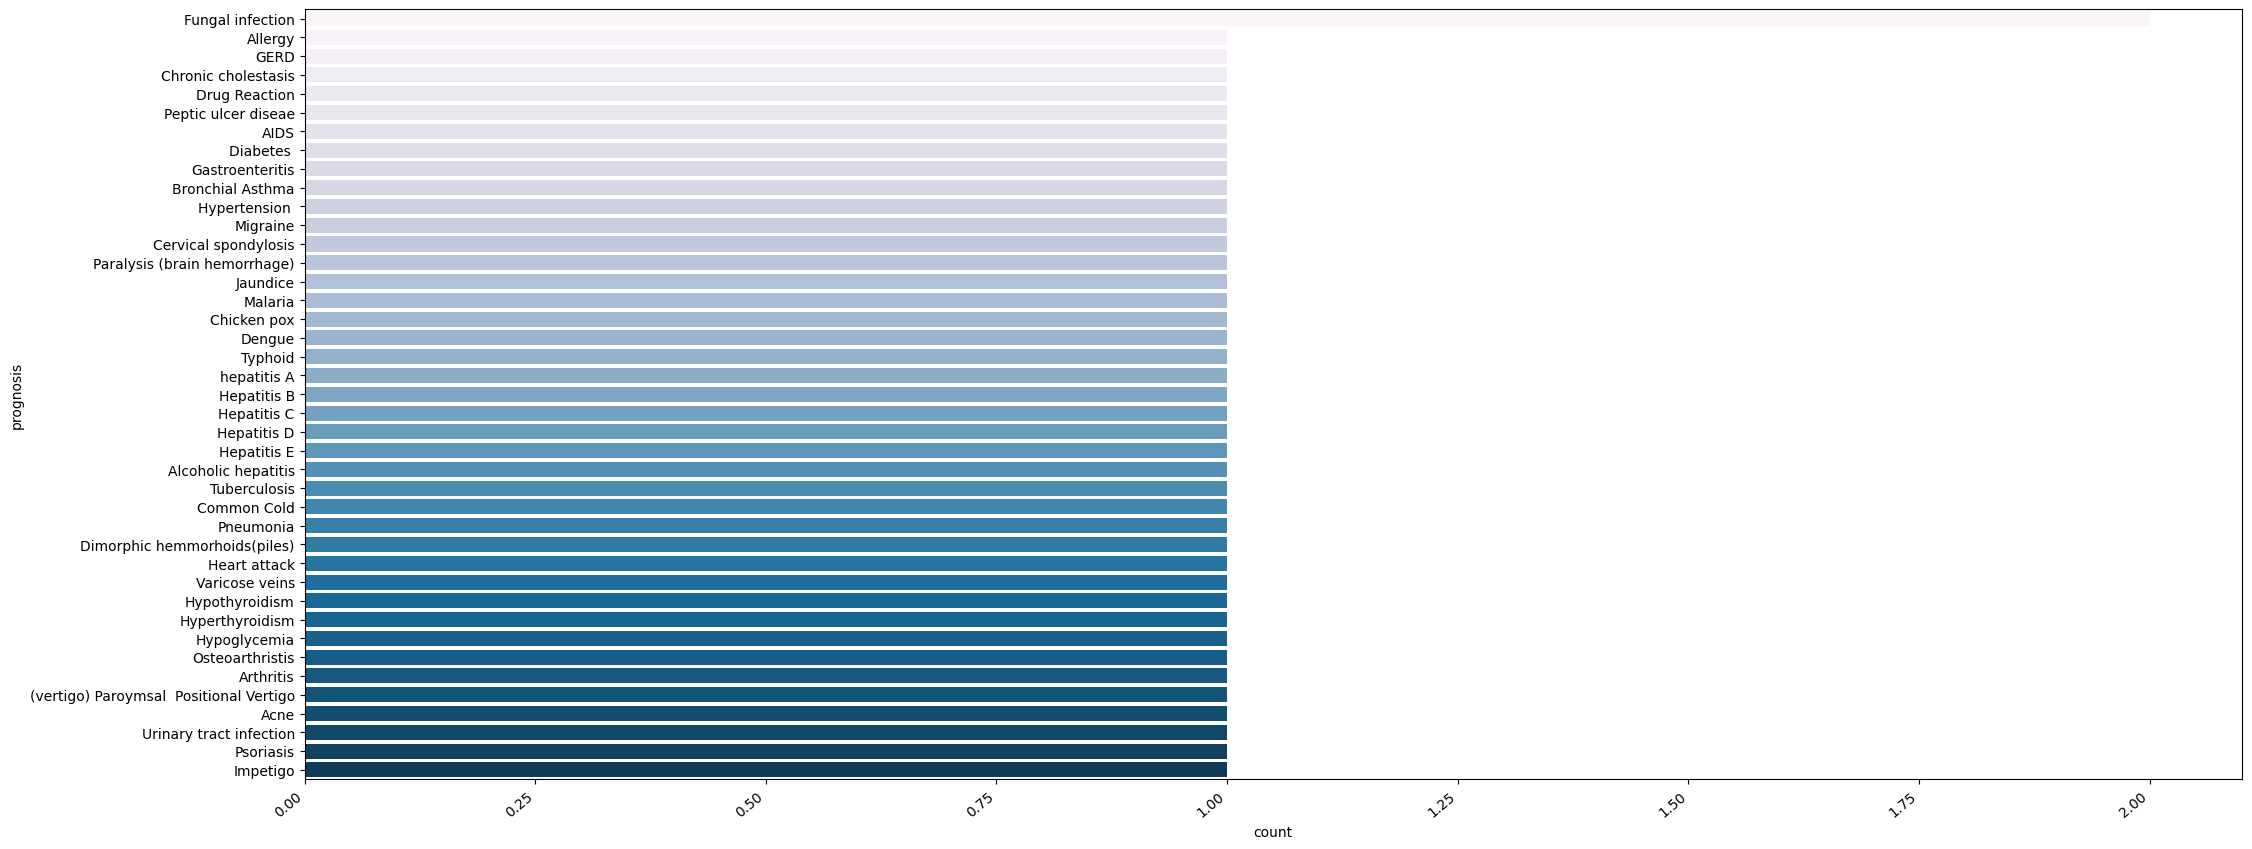

In [ ]:
# count of each target class label
plt.figure(figsize = (25, 10))
ax = sns.countplot(dftest['prognosis'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

In [ ]:
# list of all symptoms
columns = list(dftrain.columns)
columns

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


<ipython-input-35-ebe22f1723e5>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(2,2))


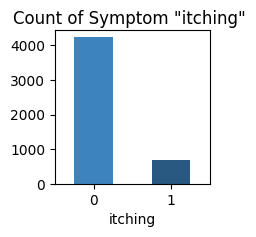

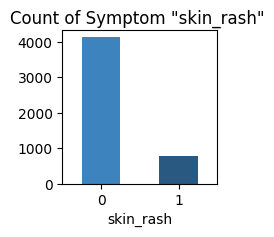

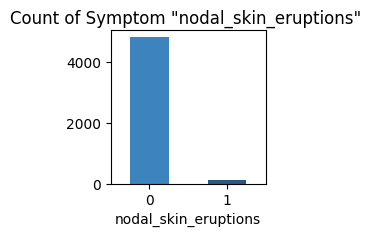

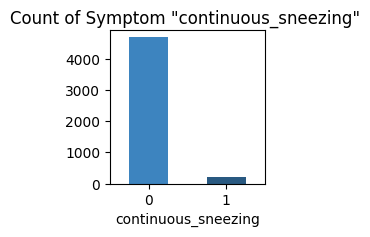

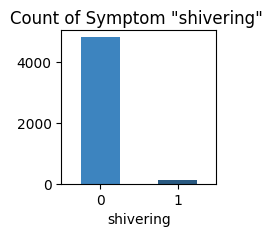

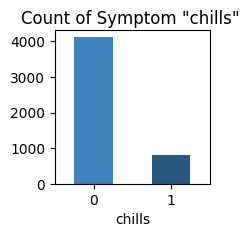

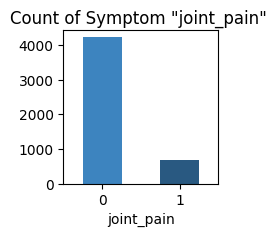

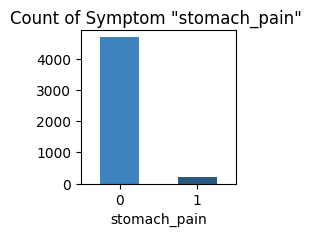

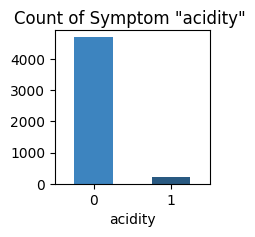

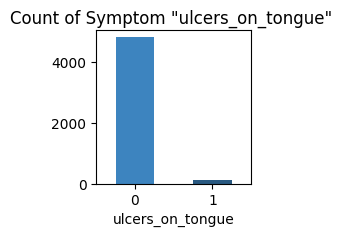

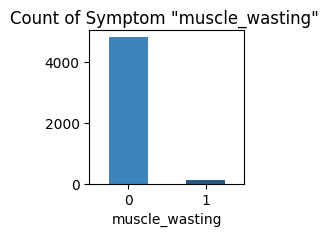

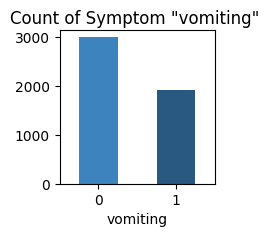

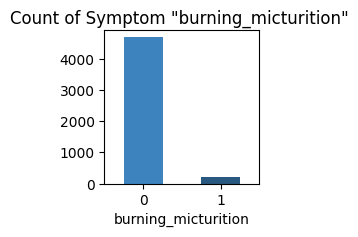

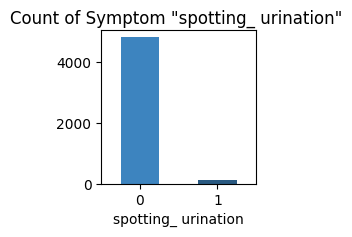

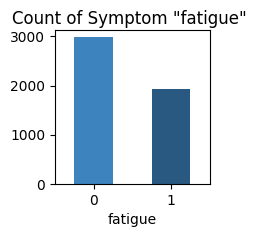

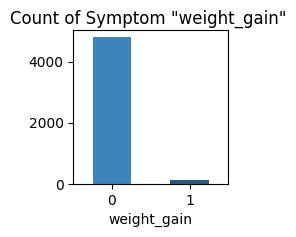

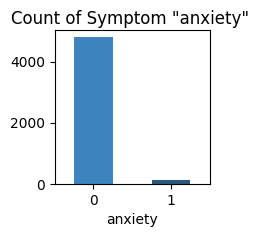

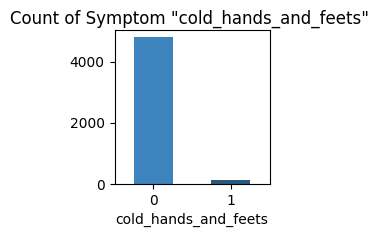

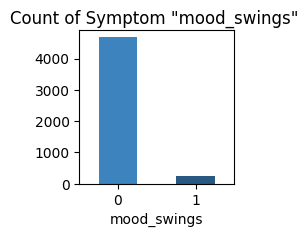

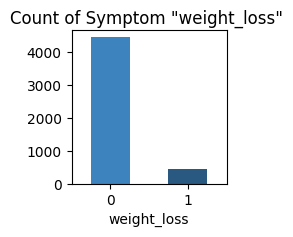

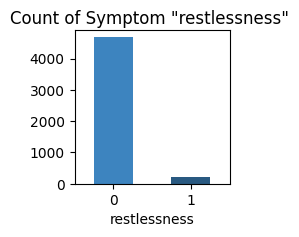

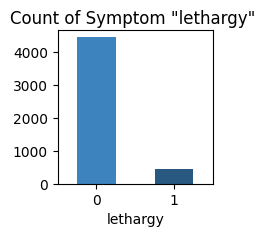

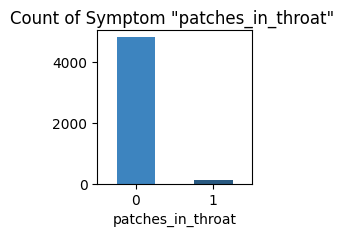

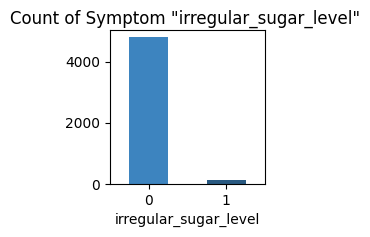

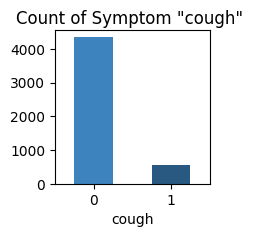

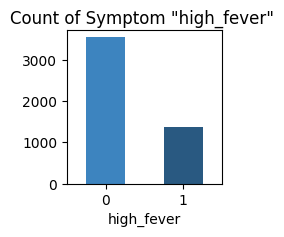

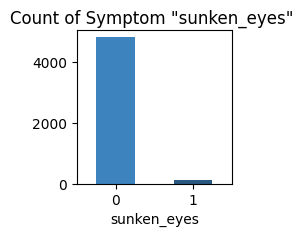

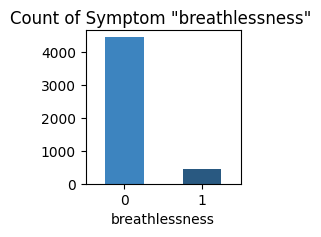

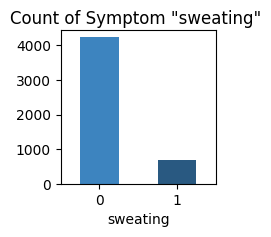

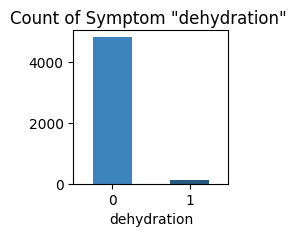

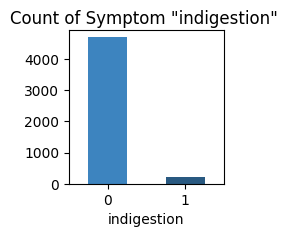

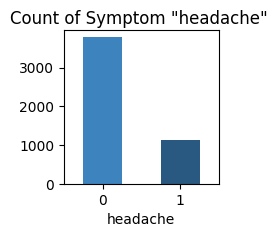

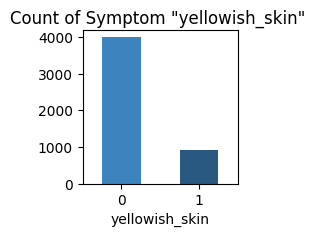

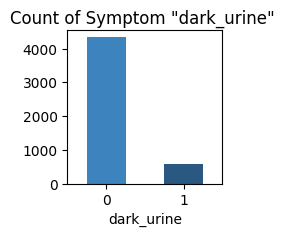

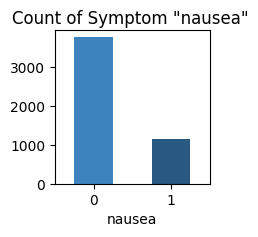

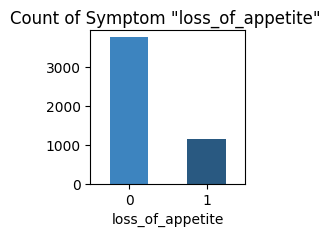

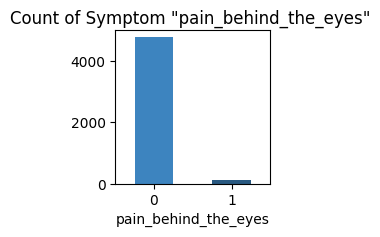

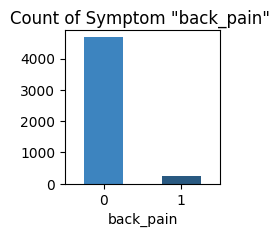

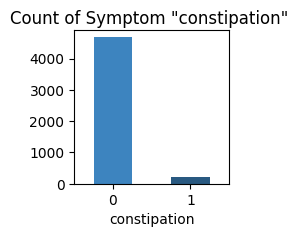

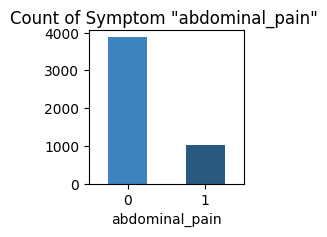

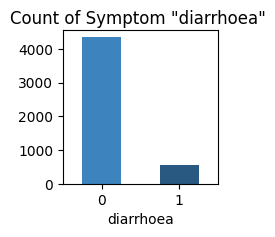

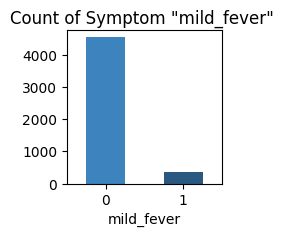

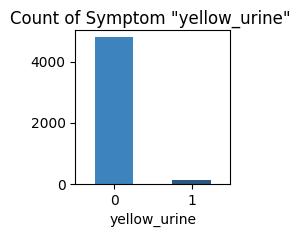

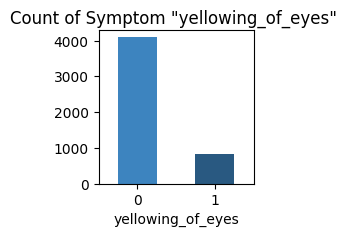

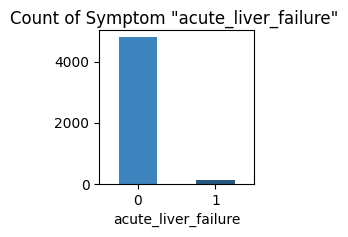

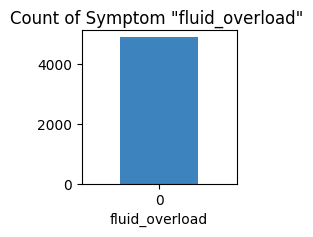

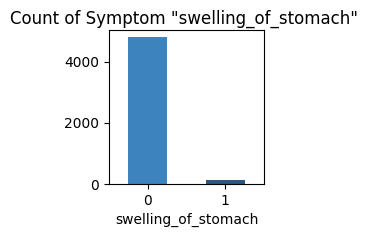

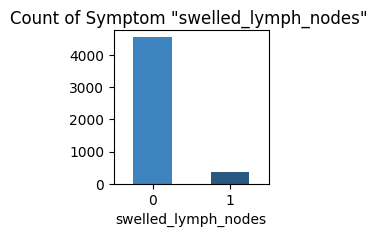

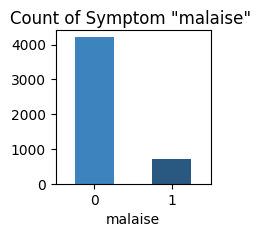

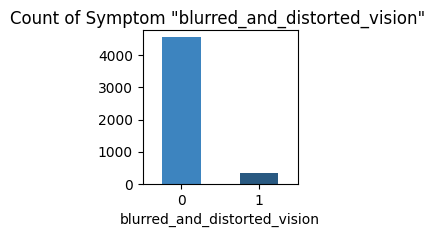

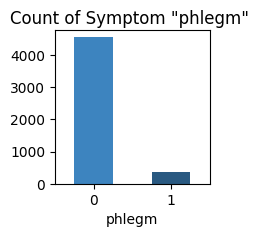

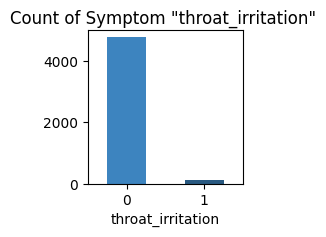

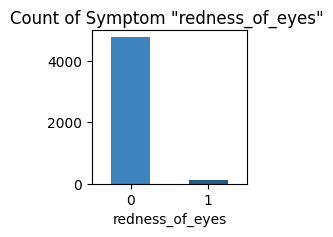

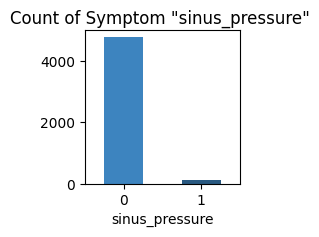

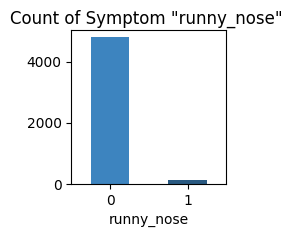

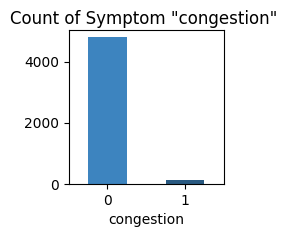

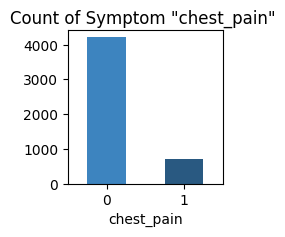

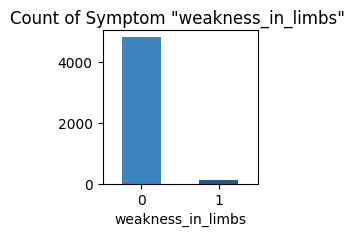

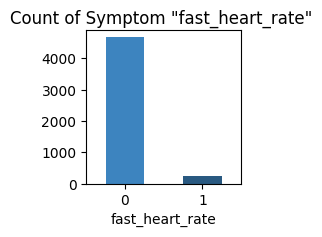

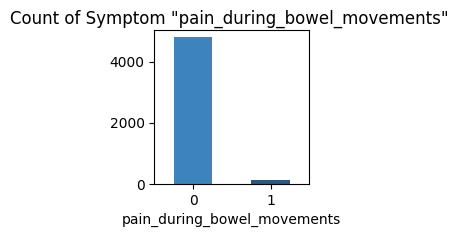

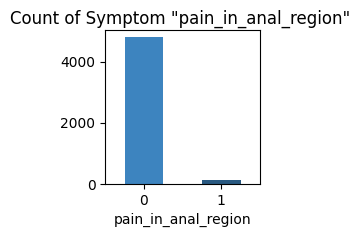

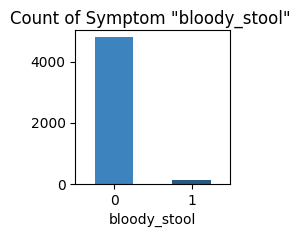

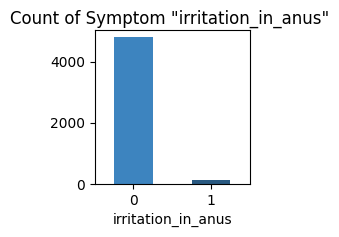

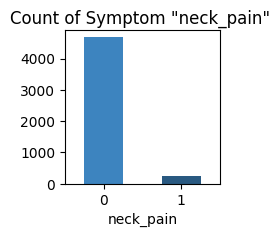

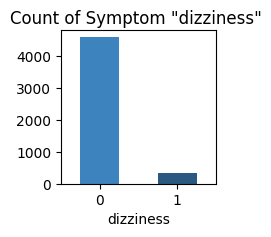

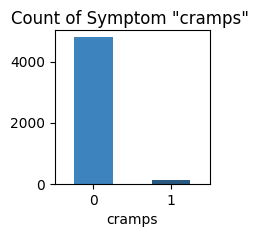

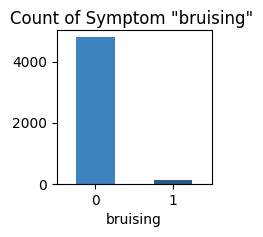

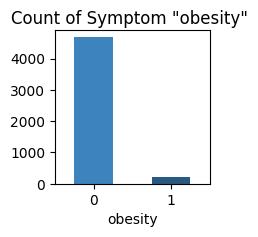

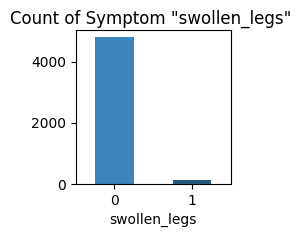

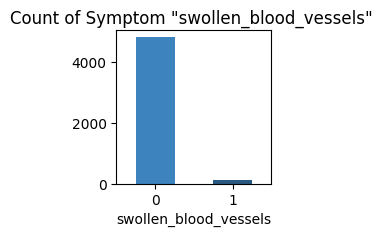

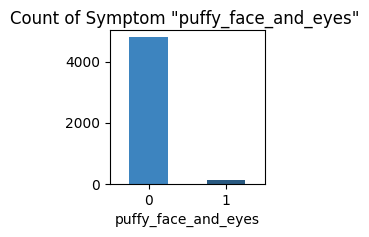

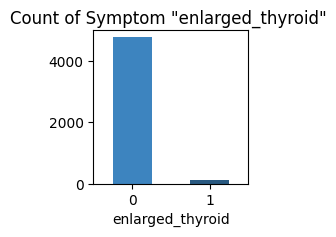

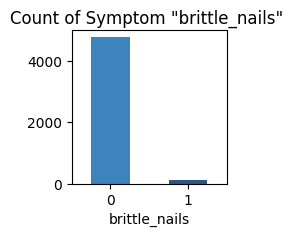

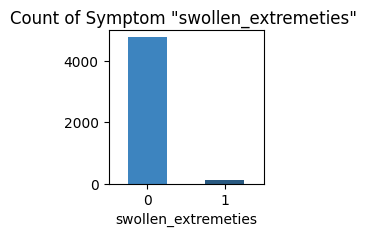

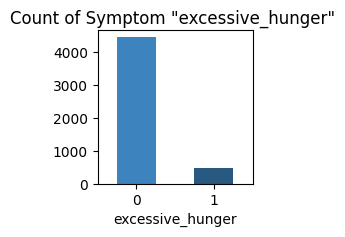

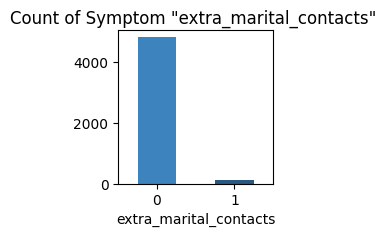

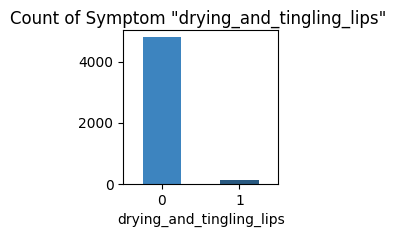

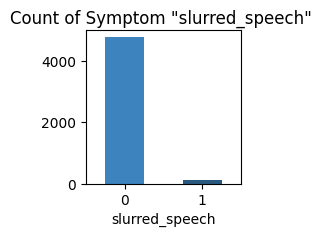

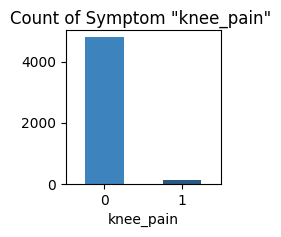

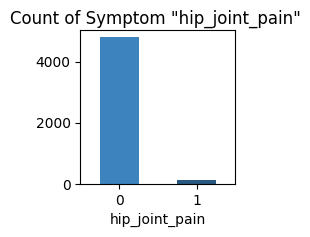

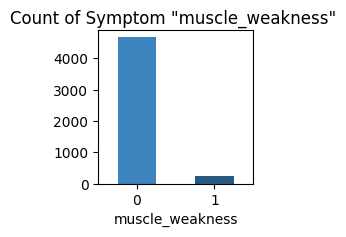

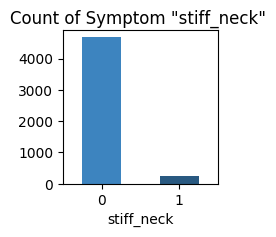

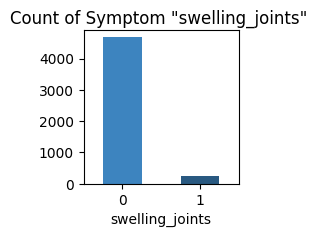

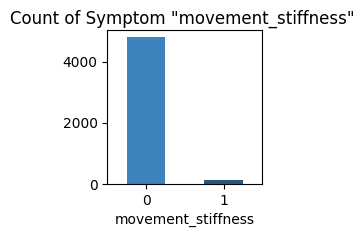

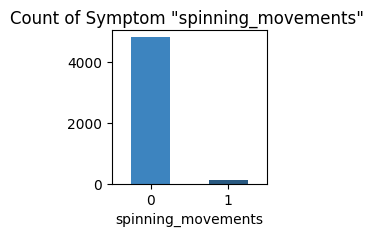

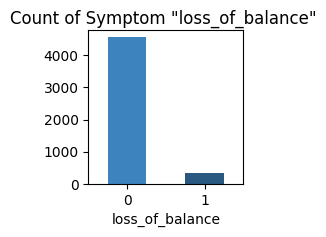

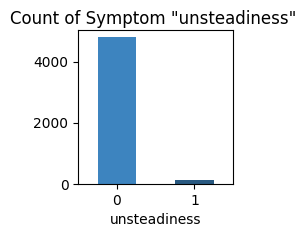

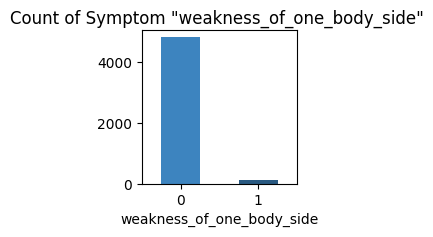

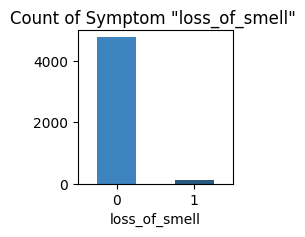

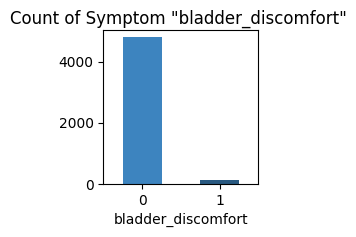

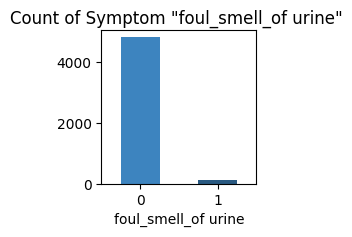

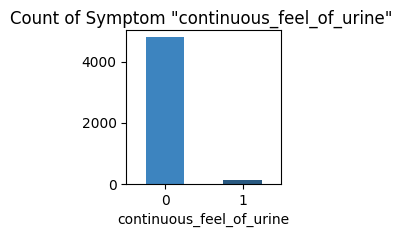

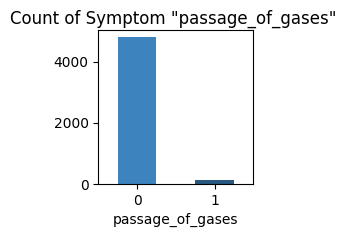

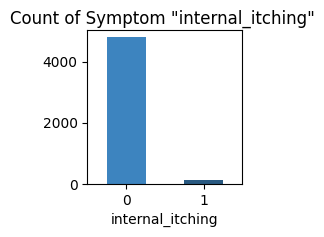

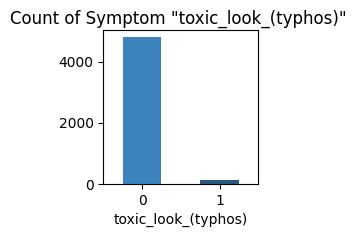

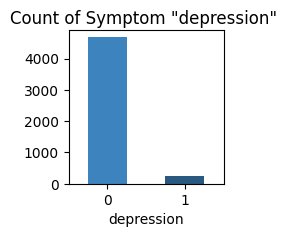

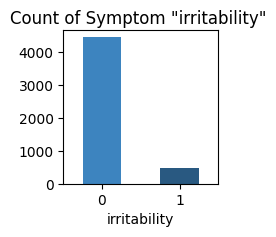

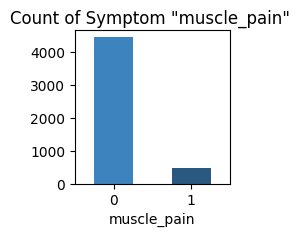

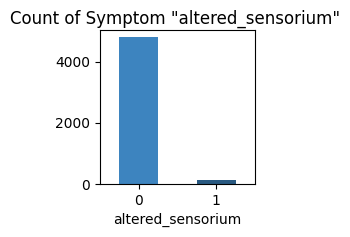

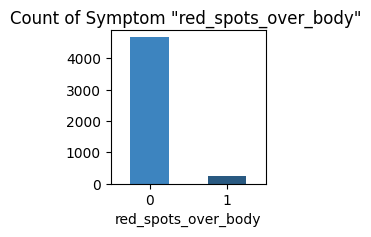

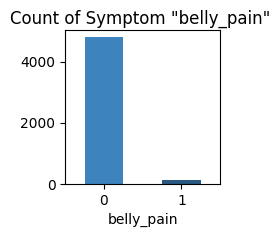

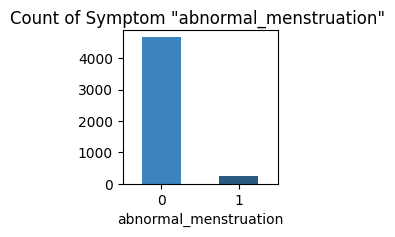

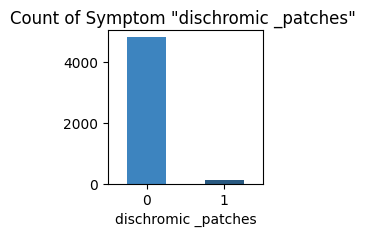

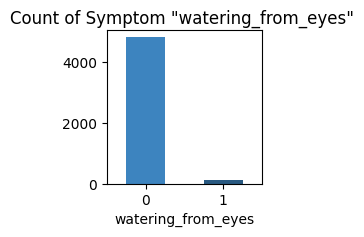

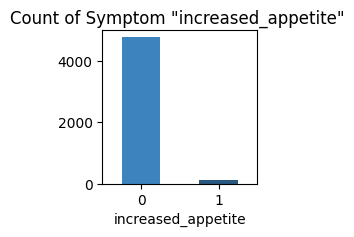

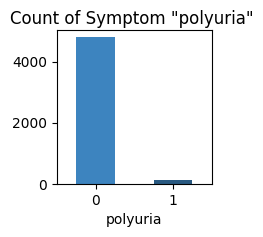

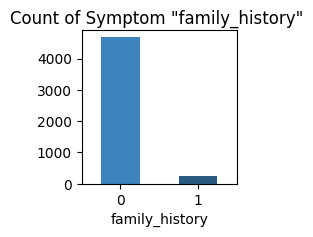

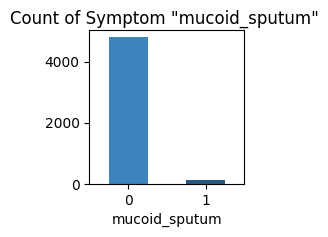

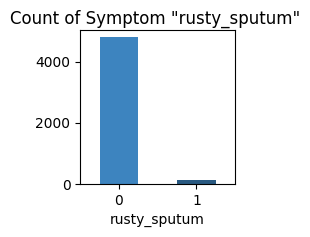

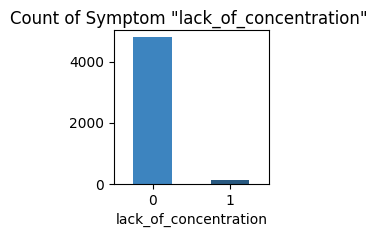

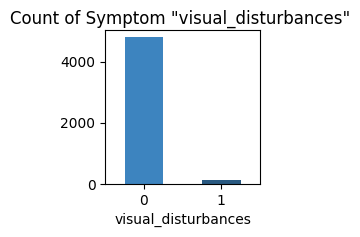

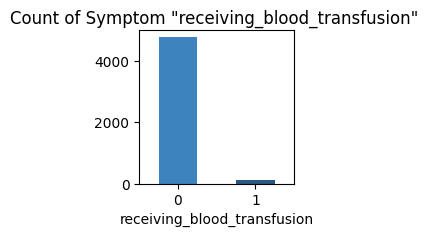

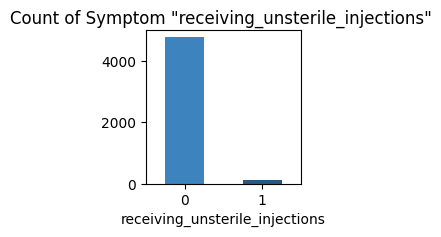

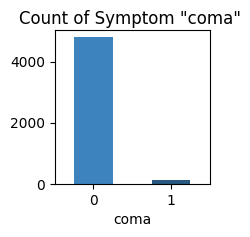

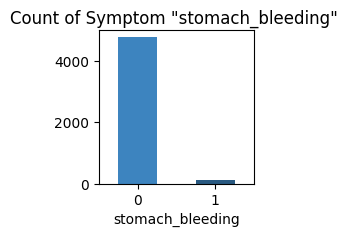

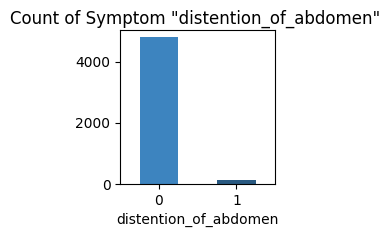

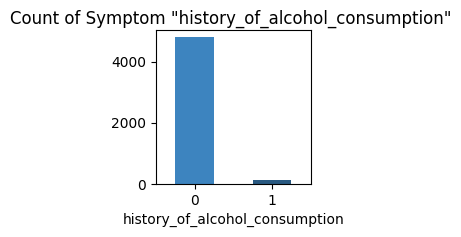

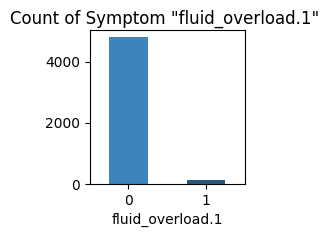

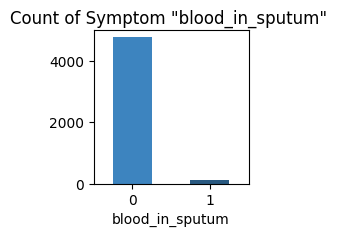

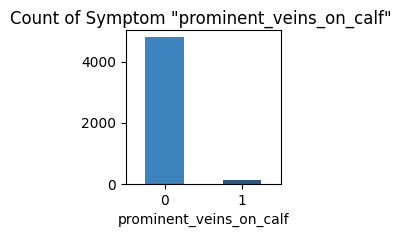

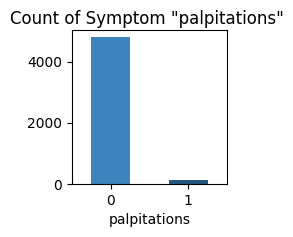

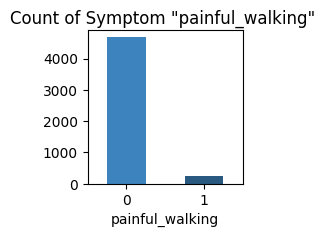

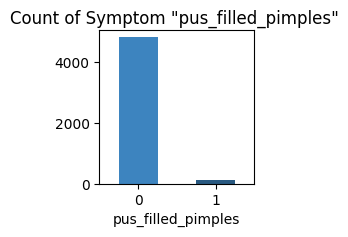

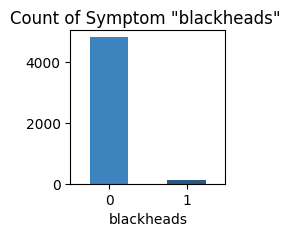

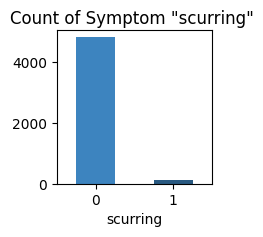

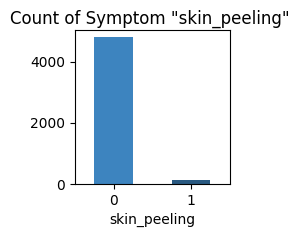

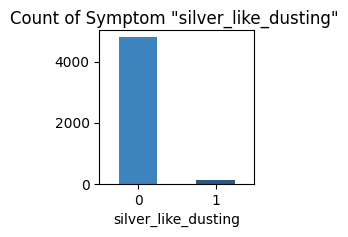

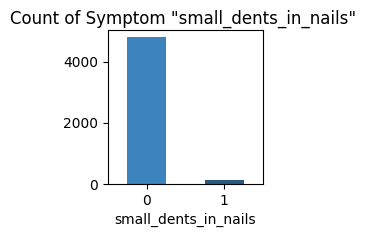

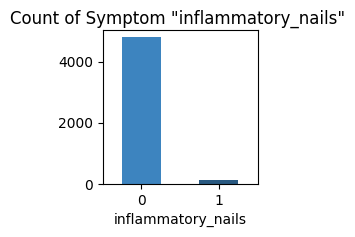

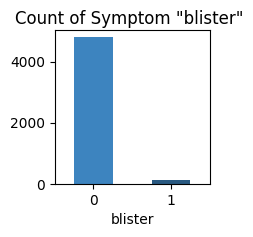

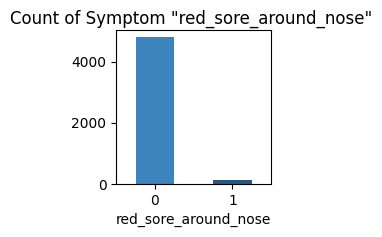

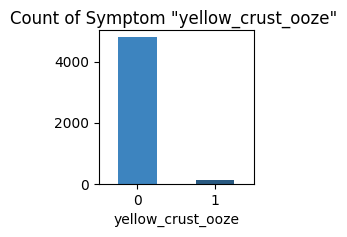

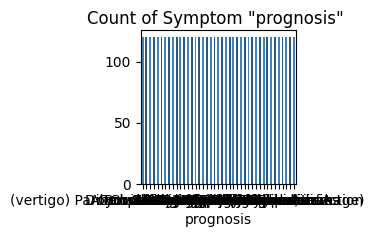

In [ ]:
colors = ['#3d84bf', '#295981']
# barplot of the count for all symptoms' absence and presence
for i in columns :
    fig, ax = plt.subplots(figsize=(2,2))
    bar = dftrain.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")

<ipython-input-36-07defb87fef2>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(2,2))


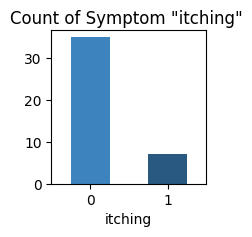

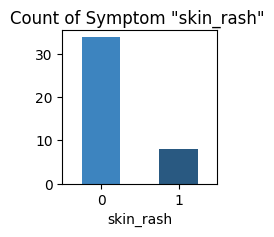

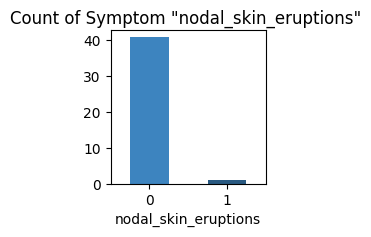

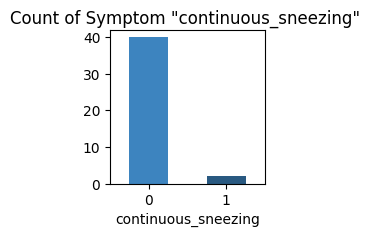

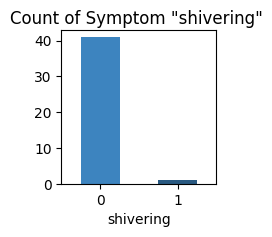

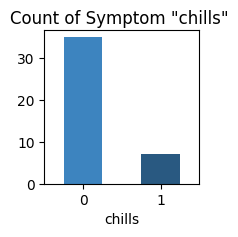

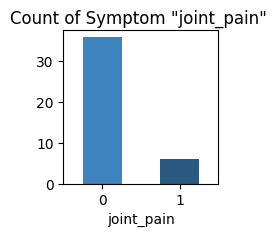

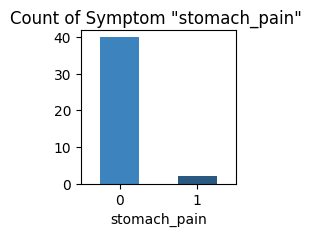

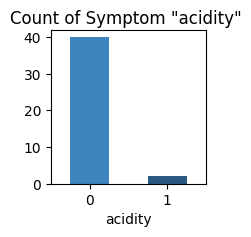

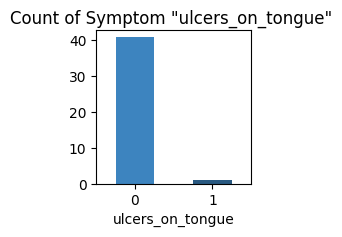

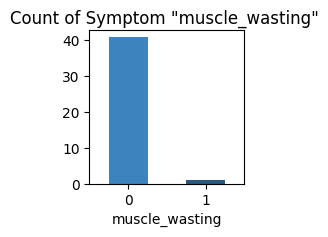

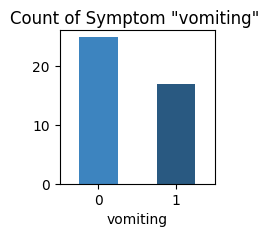

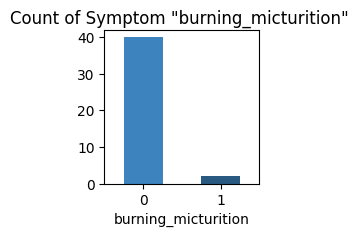

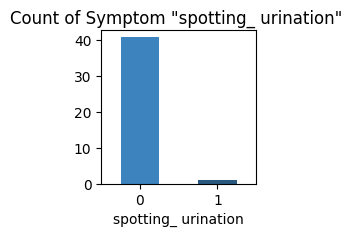

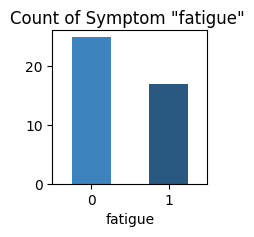

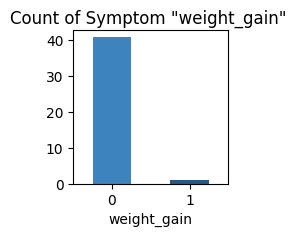

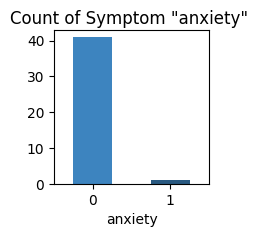

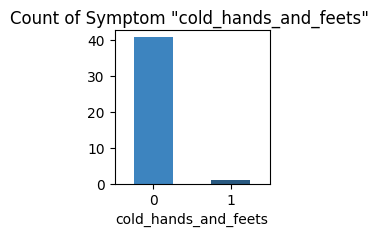

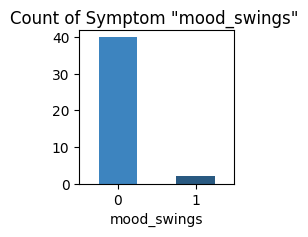

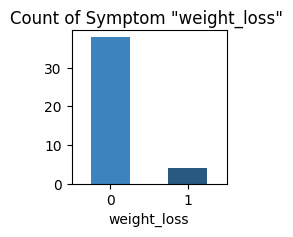

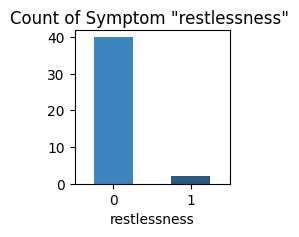

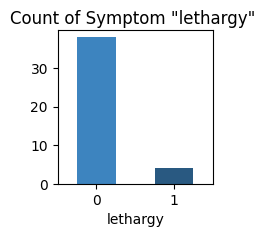

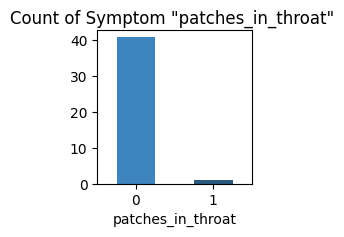

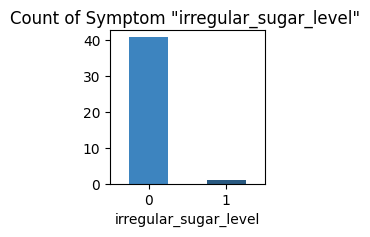

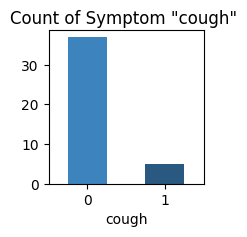

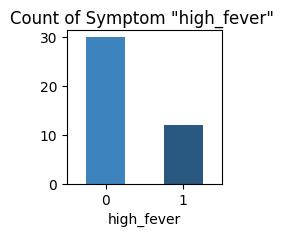

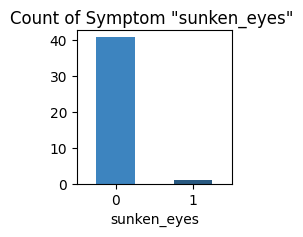

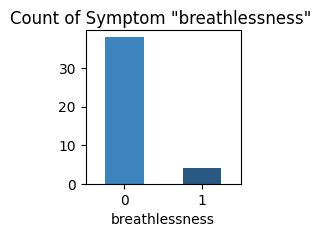

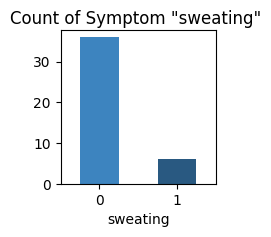

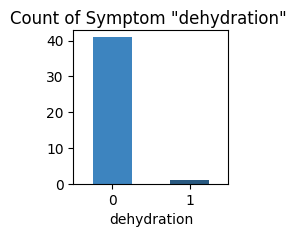

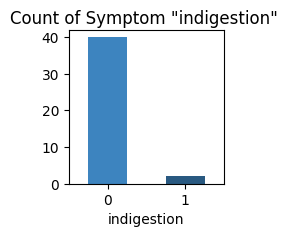

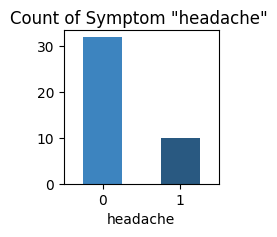

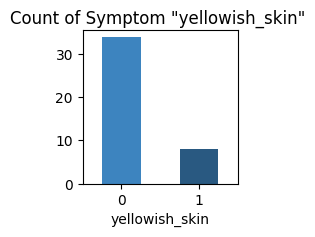

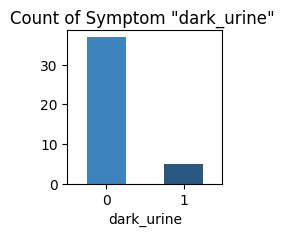

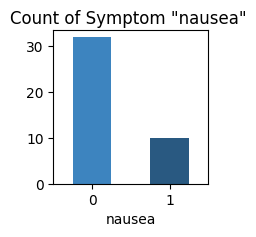

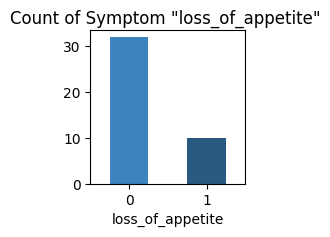

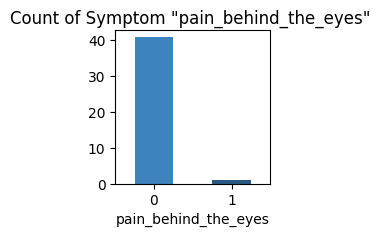

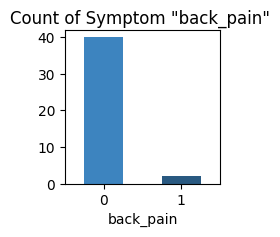

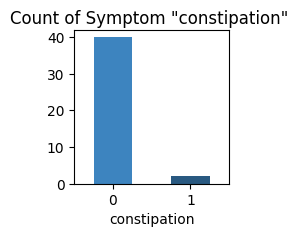

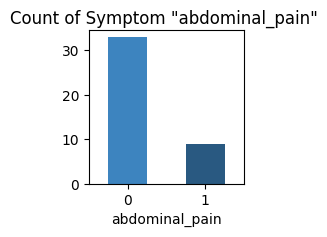

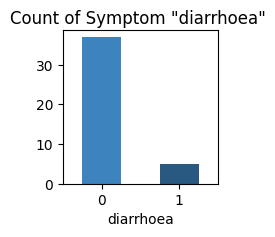

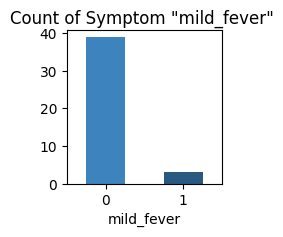

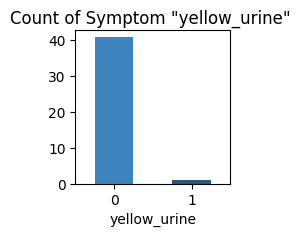

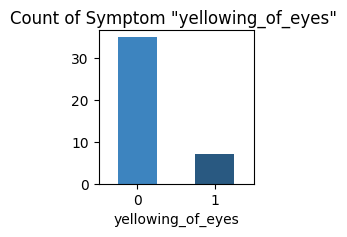

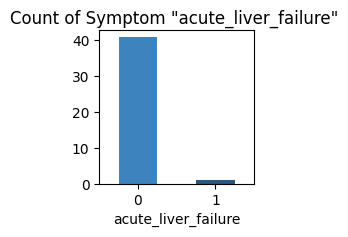

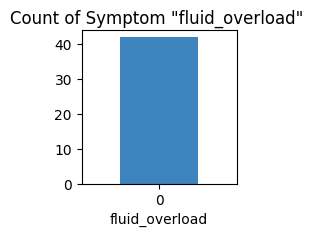

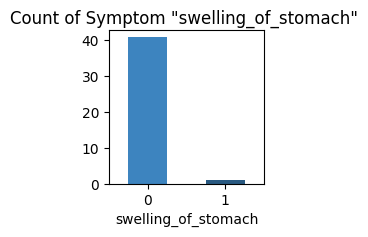

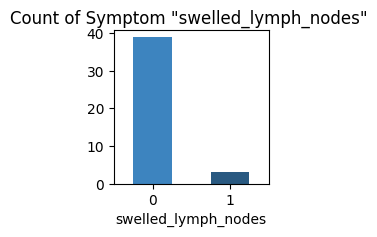

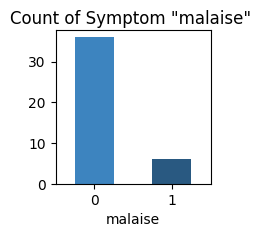

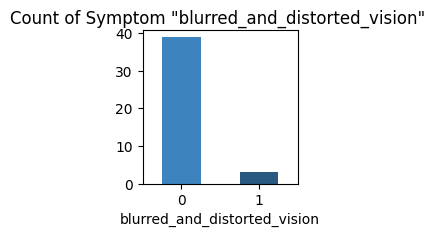

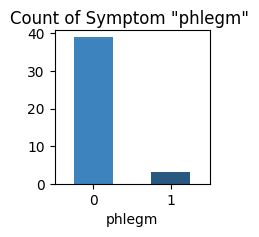

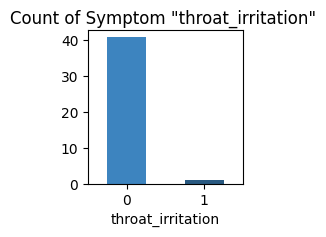

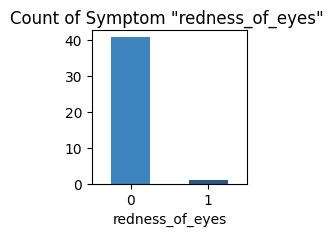

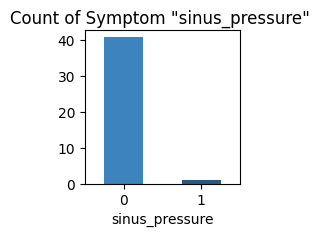

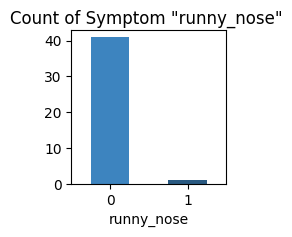

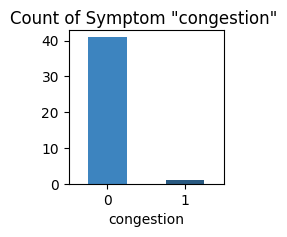

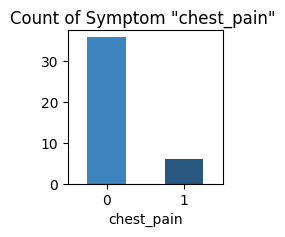

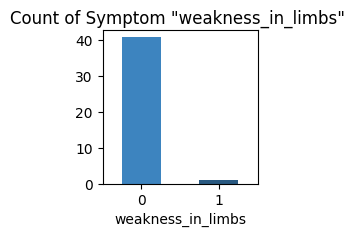

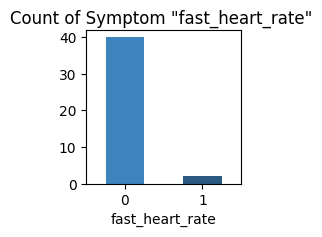

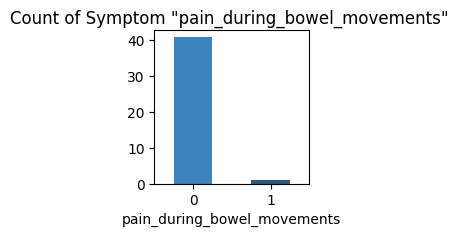

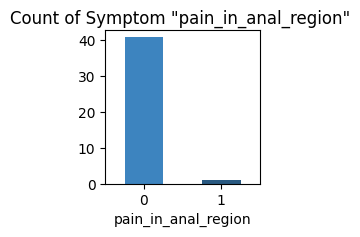

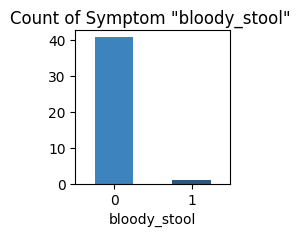

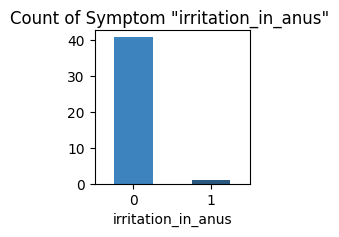

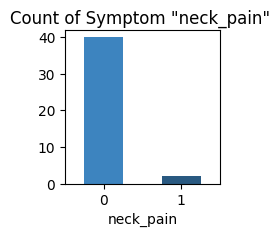

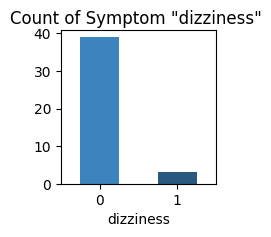

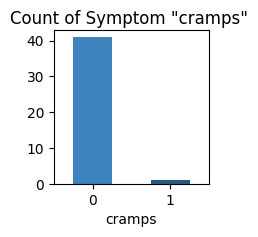

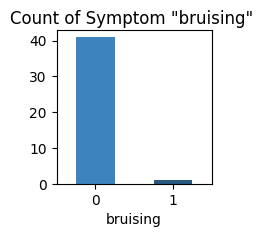

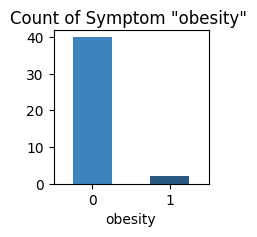

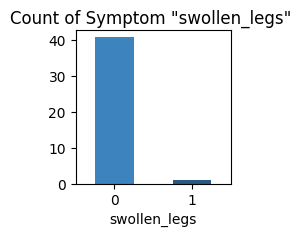

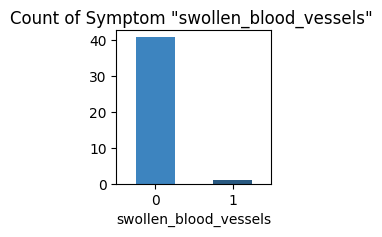

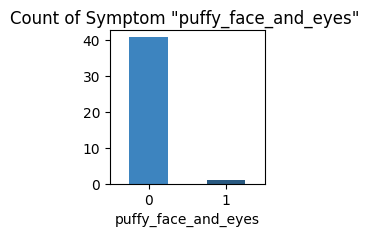

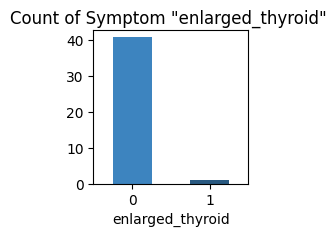

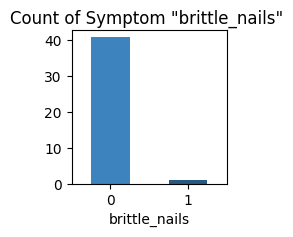

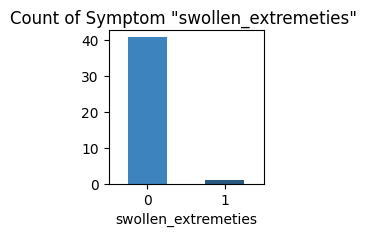

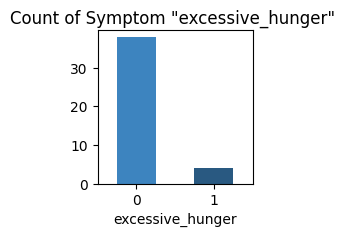

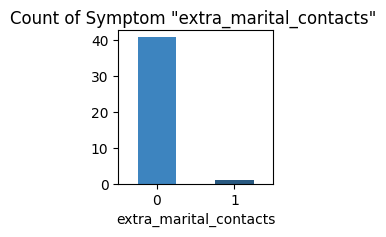

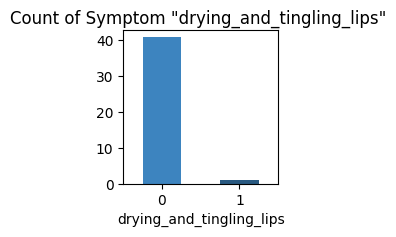

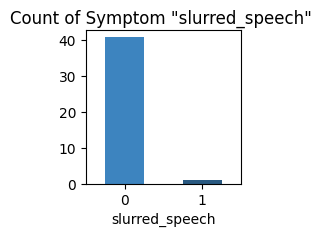

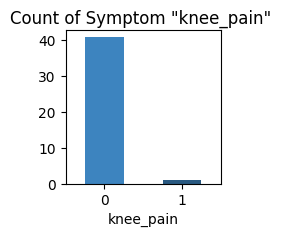

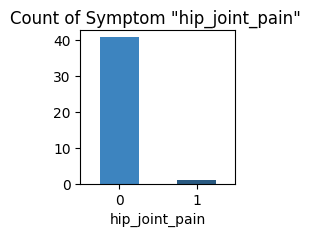

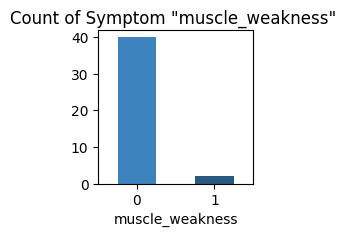

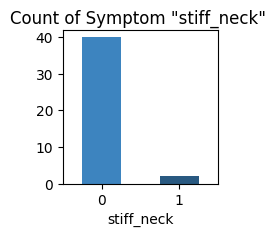

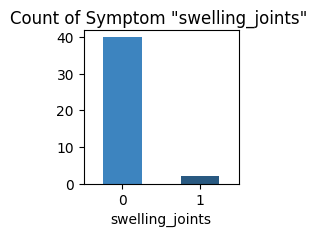

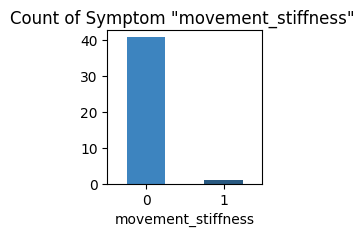

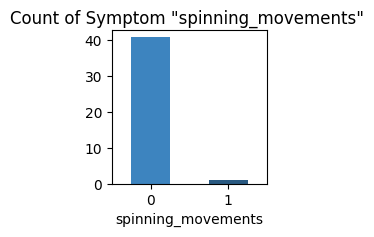

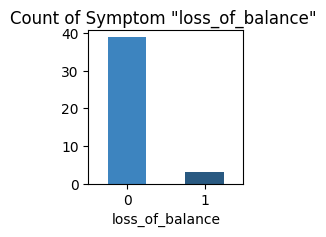

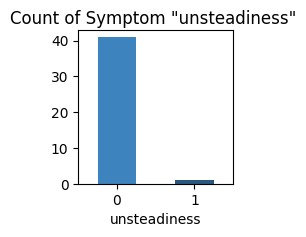

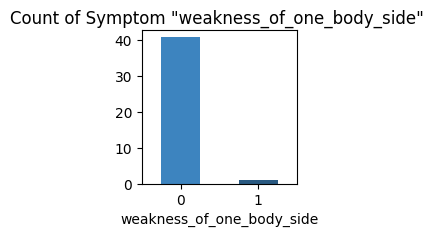

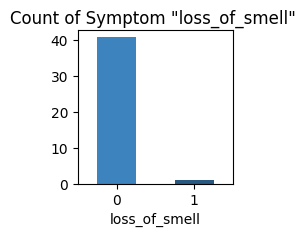

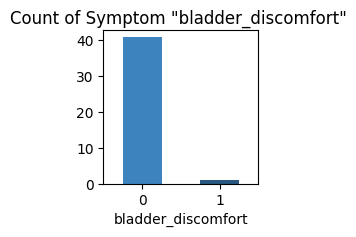

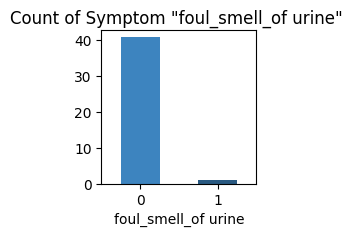

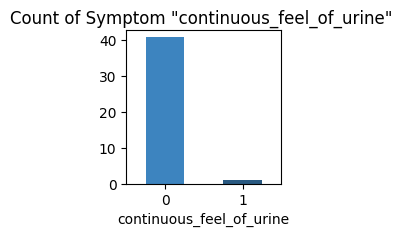

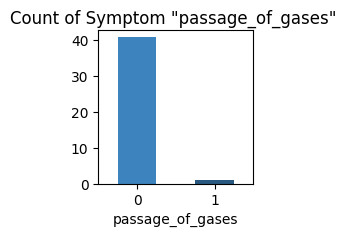

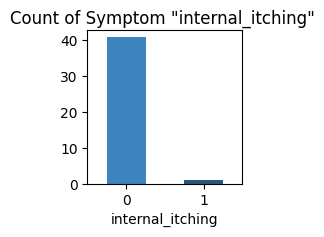

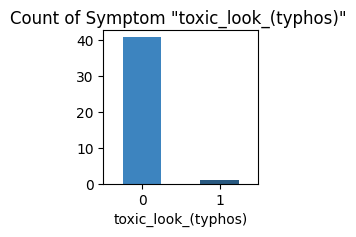

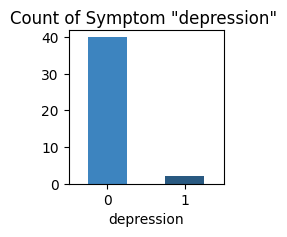

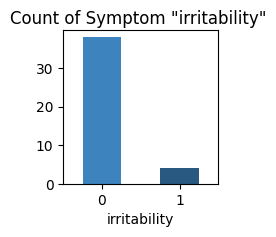

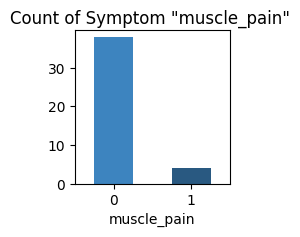

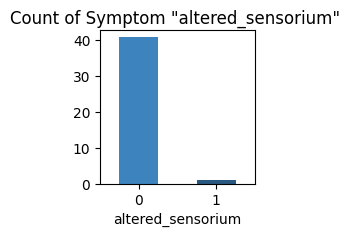

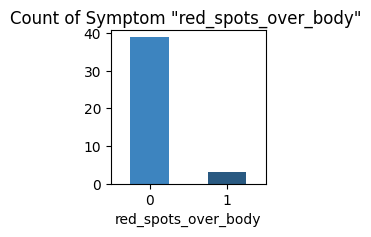

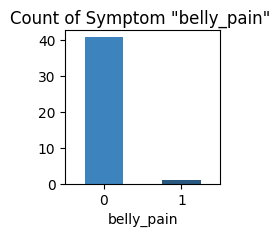

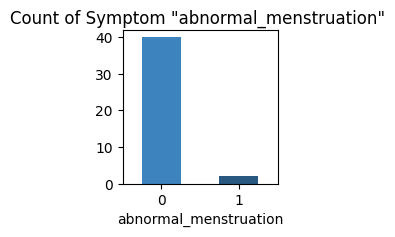

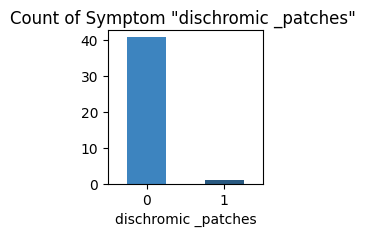

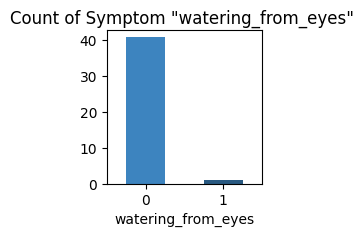

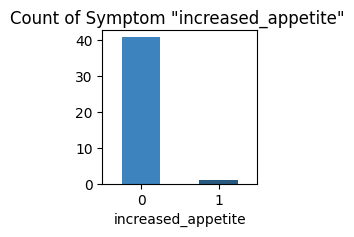

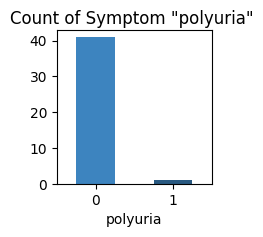

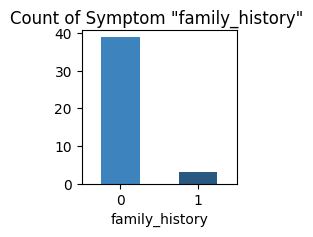

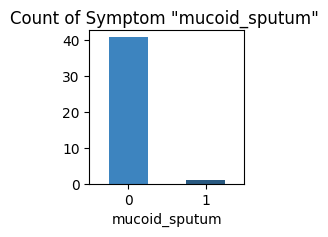

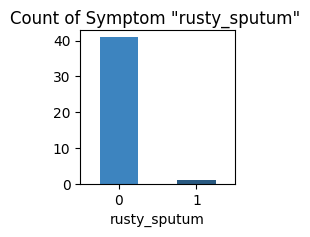

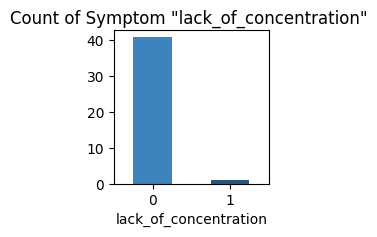

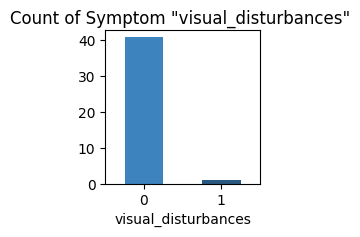

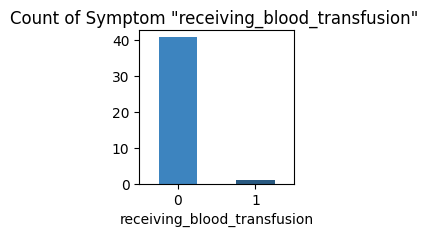

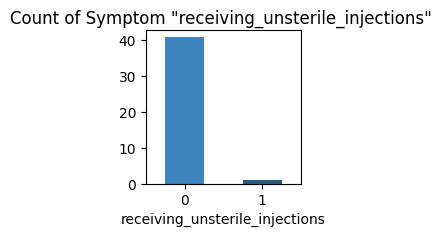

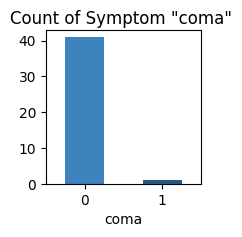

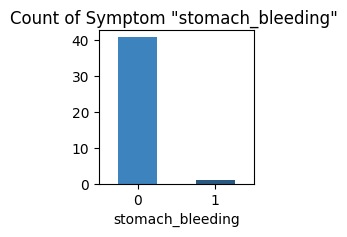

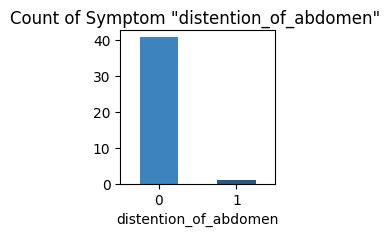

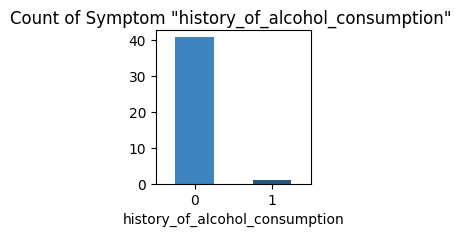

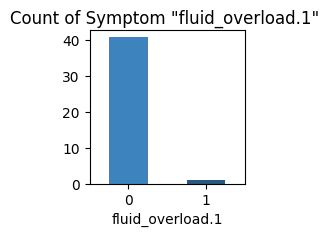

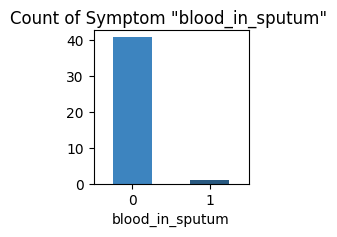

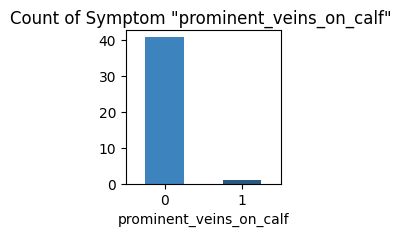

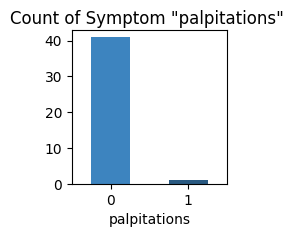

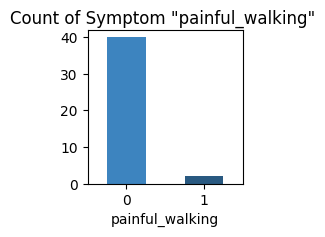

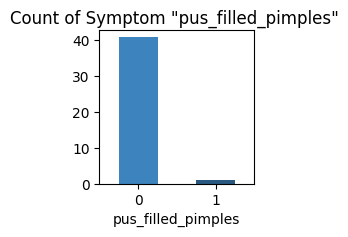

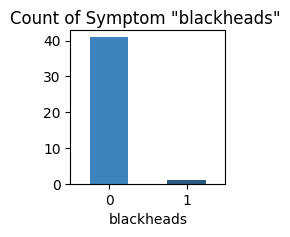

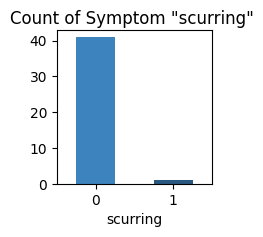

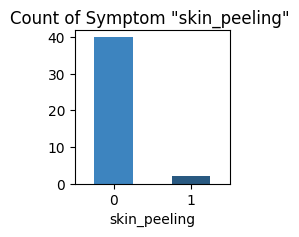

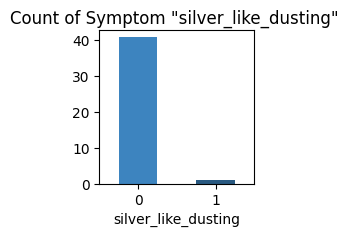

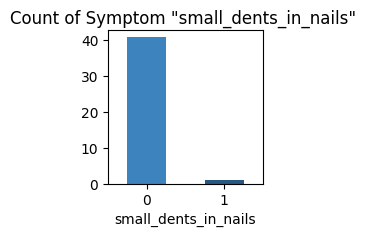

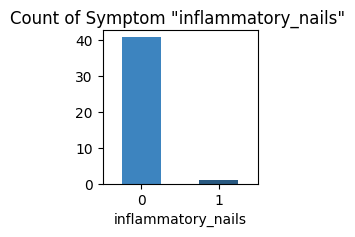

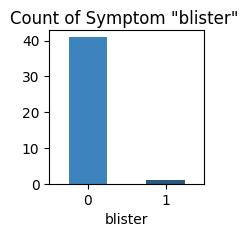

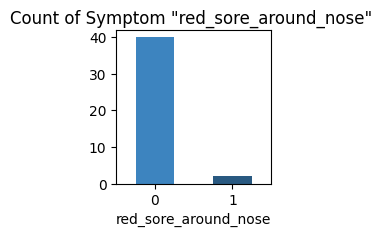

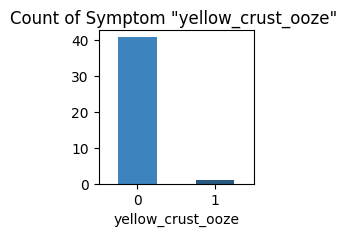

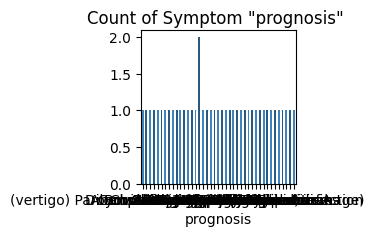

In [ ]:
colors = ['#3d84bf', '#295981']
# barplot of the count for all symptoms' absence and presence
for i in columns :
    fig, ax = plt.subplots(figsize=(2,2))
    bar = dftest.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")

<ipython-input-39-71aa64a15cfb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dftrain.corr(), cmap = 'PuBu', annot = False)


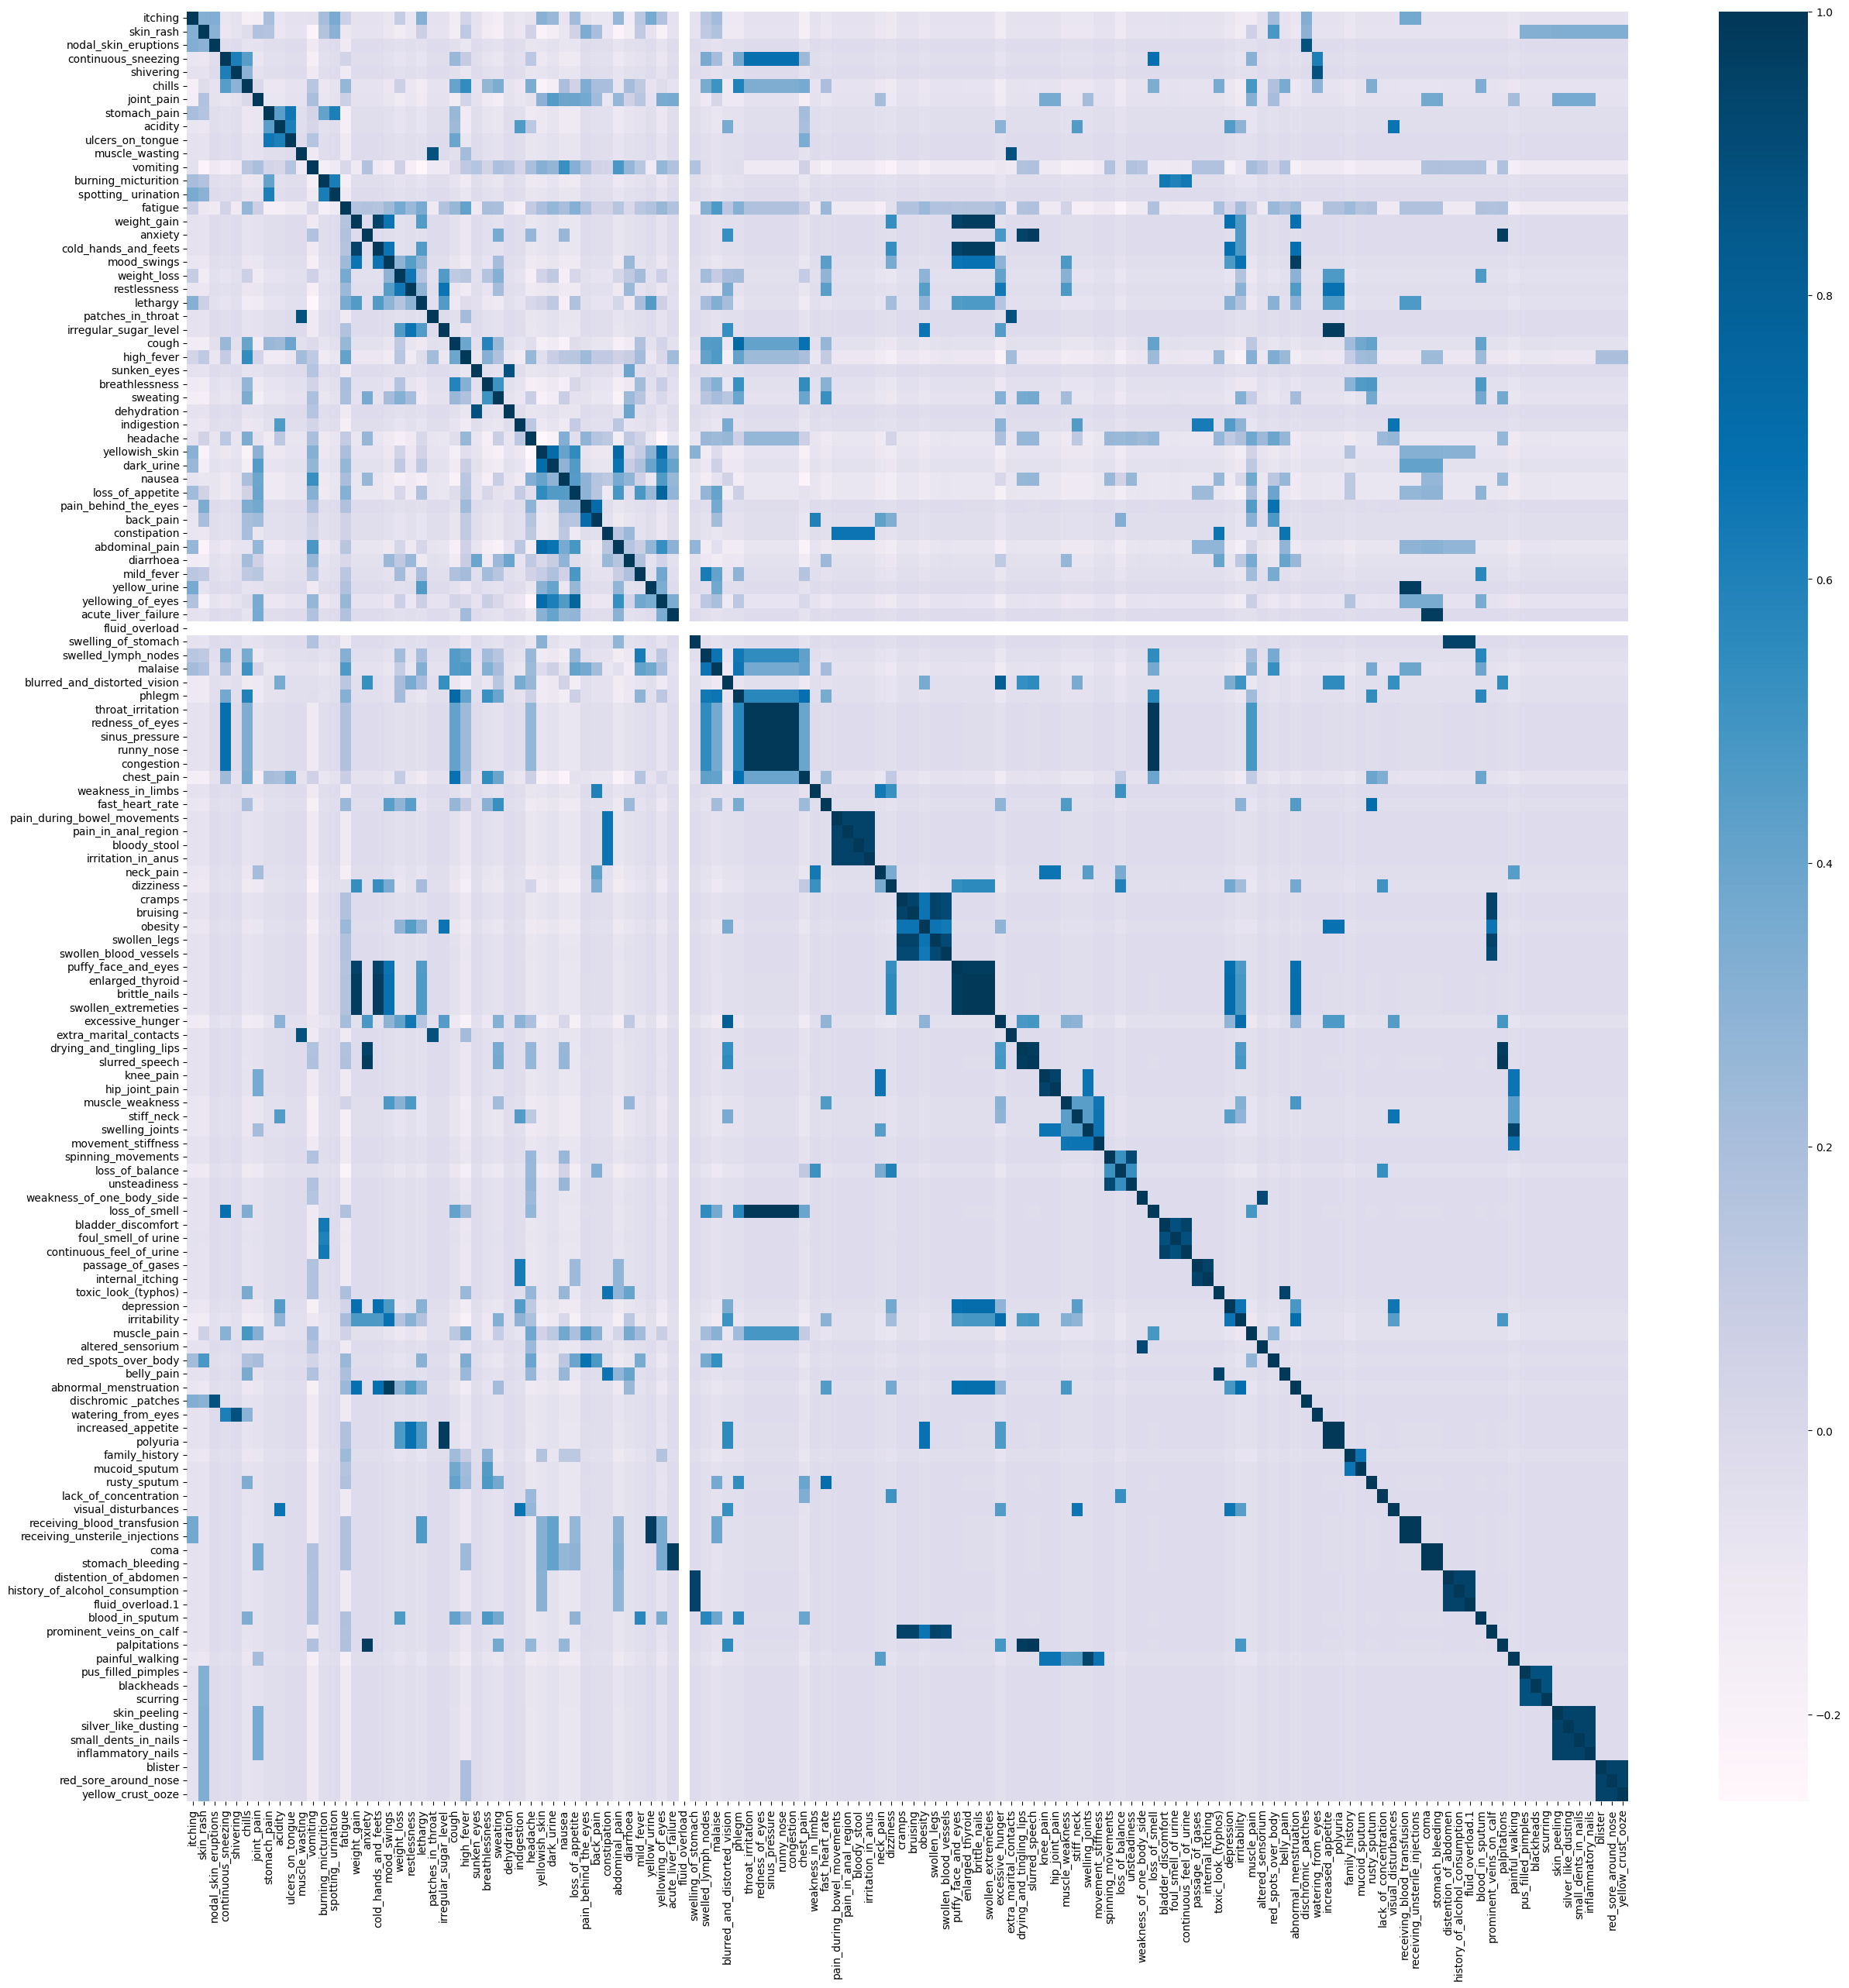

In [ ]:
# compare linear relationships between attributes using correlation coefficient generated using correlation heatmap
plt.figure(figsize = (30, 30))
sns.heatmap(dftrain.corr(), cmap = 'PuBu', annot = False)
plt.show()

In [45]:
# summary statistics of the attributes, including measures of central tendency and measures of dispersion
dftrain.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples   blackheads     scurring  \
count       4920.000000  ...         4920.000000  4920.000000  4920.000000   
mean           0.021951  ...            0.021951     0.021951     0.021951   
std            0.146539  ...            0.146539     0.146539     0.146539   
min            0.000000  ...            0.000000     0.000000     0.000000   
25%            0.000000  ...            0.000000     0.000000     0.000000   
50%            0.000000  ...            0.000000     0.000000     0.000000   
75%            0.000000  ...            0.000000     0.000000     0.000000   
max            1.000000  ...            1.000000     1.000000     1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count   4920.000000          4920.000000           4920.000000   
mean       0.023171             0.023171              0.023171   
std        0.150461             0.150461              0.150461   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails      blister  red_sore_around_nose  \
count         4920.000000  4920.000000           4920.000000   
mean             0.023171     0.023171              0.023171   
std              0.150461     0.150461              0.150461   
min              0.000000     0.000000              0.000000   
25%              0.000000     0.000000              0.000000   
50%              0.000000     0.000000              0.000000   
75%              0.000000     0.000000              0.000000   
max              1.000000     1.000000              1.000000   

       yellow_crust_ooze  
count        4920.000000  
mean            0.023171  
std             0.150461  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 132 columns]

In [46]:
# summary statistics of the attributes, including measures of central tendency and measures of dispersion
dftest.describe()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  42.000000  42.000000             42.000000            42.000000   
mean    0.166667   0.190476              0.023810             0.047619   
std     0.377195   0.397437              0.154303             0.215540   
min     0.000000   0.000000              0.000000             0.000000   
25%     0.000000   0.000000              0.000000             0.000000   
50%     0.000000   0.000000              0.000000             0.000000   
75%     0.000000   0.000000              0.000000             0.000000   
max     1.000000   1.000000              1.000000             1.000000   

       shivering     chills  joint_pain  stomach_pain    acidity  \
count  42.000000  42.000000   42.000000     42.000000  42.000000   
mean    0.023810   0.166667    0.142857      0.047619   0.047619   
std     0.154303   0.377195    0.354169      0.215540   0.215540   
min     0.000000   0.000000    0.000000      0.000000   0.000000   
25%     0.000000   0.000000    0.000000      0.000000   0.000000   
50%     0.000000   0.000000    0.000000      0.000000   0.000000   
75%     0.000000   0.000000    0.000000      0.000000   0.000000   
max     1.000000   1.000000    1.000000      1.000000   1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples  blackheads   scurring  \
count         42.000000  ...           42.000000   42.000000  42.000000   
mean           0.023810  ...            0.023810    0.023810   0.023810   
std            0.154303  ...            0.154303    0.154303   0.154303   
min            0.000000  ...            0.000000    0.000000   0.000000   
25%            0.000000  ...            0.000000    0.000000   0.000000   
50%            0.000000  ...            0.000000    0.000000   0.000000   
75%            0.000000  ...            0.000000    0.000000   0.000000   
max            1.000000  ...            1.000000    1.000000   1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count     42.000000            42.000000             42.000000   
mean       0.047619             0.023810              0.023810   
std        0.215540             0.154303              0.154303   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails    blister  red_sore_around_nose  yellow_crust_ooze  
count           42.000000  42.000000             42.000000          42.000000  
mean             0.023810   0.023810              0.047619           0.023810  
std              0.154303   0.154303              0.215540           0.154303  
min              0.000000   0.000000              0.000000           0.000000  
25%              0.000000   0.000000              0.000000           0.000000  
50%              0.000000   0.000000              0.000000           0.000000  
75%              0.000000   0.000000              0.000000           0.000000  
max              1.000000   1.000000              1.000000           1.000000  

[8 rows x 132 columns]

In [47]:
# classify and model the data using Multilayer Perceptron (MLP) Neural Network, Decision Tree (DT), and Random Forest (RF)
    # machine learning algorithms

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

# split dataset into attributes and labels
X_train = dftrain.iloc[:, :-1].values # the training attributes
y_train = dftrain.iloc[:, 132].values # the training labels
X_test = dftest.iloc[:, :-1].values # the testing attributes
y_test = dftest.iloc[:, 132].values # the testing labels

In [48]:
# using DT based on information gain
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [49]:
# using RF classifier
classifierRF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

In [50]:
# using MLP classifier
classifierMLP = MLPClassifier()
classifierMLP.fit(X_train, y_train)

MLPClassifier()

In [51]:
# use the chosen three models to make predictions on test data
y_predMLP = classifierMLP.predict(X_test)
y_predDT = classifierDT.predict(X_test)
y_predRF = classifierRF.predict(X_test)

In [52]:
# for MLP model
# using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predMLP))
print(classification_report(y_test, y_predMLP))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, classifierMLP.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predMLP))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [53]:
# for RF model
# using confusion matrix
print(confusion_matrix(y_test, y_predRF))
print(classification_report(y_test, y_predRF))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierRF.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predRF))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [54]:
# for DT model
# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

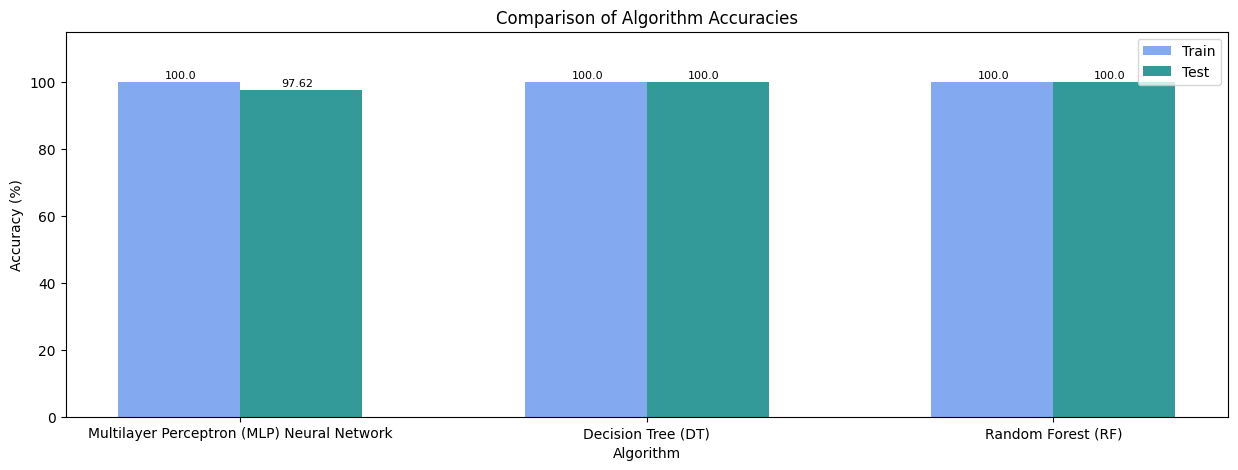

In [55]:
# data to plot
n_groups = 3
algorithms = ('Multilayer Perceptron (MLP) Neural Network', 'Decision Tree (DT)', 'Random Forest (RF)')
train_accuracy = (accuracy_score(y_train, classifierMLP.predict(X_train))*100,
                  accuracy_score(y_train, classifierDT.predict(X_train))*100,
                  accuracy_score(y_train, classifierRF.predict(X_train))*100)
test_accuracy = (accuracy_score(y_test, y_predMLP)*100,
                 accuracy_score(y_test, y_predDT)*100,
                 accuracy_score(y_test, y_predRF)*100)

# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
plt.show()

In [56]:
# identify the important features in DT
imp = classifierDT.feature_importances_
imp

array([0.03009197, 0.05380291, 0.        , 0.        , 0.00147734,
       0.01450826, 0.0009105 , 0.00816213, 0.00360073, 0.        ,
       0.        , 0.0998201 , 0.00062708, 0.00209956, 0.15787755,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00045525, 0.        , 0.00963786,
       0.05712469, 0.        , 0.001821  , 0.00136575, 0.0009105 ,
       0.00082164, 0.03558298, 0.01703077, 0.00465436, 0.04582923,
       0.06982485, 0.        , 0.        , 0.00082164, 0.02409985,
       0.01170182, 0.0017042 , 0.        , 0.02594255, 0.00045525,
       0.        , 0.        , 0.00045525, 0.02816341, 0.        ,
       0.        , 0.0081945 , 0.        , 0.        , 0.        ,
       0.        , 0.0472673 , 0.00062708, 0.        , 0.        ,
       0.        , 0.01181628, 0.        , 0.0046478 , 0.019202  ,
       0.        , 0.00045525, 0.00188551, 0.00398362, 0.        ,
       0.        , 0.00841768, 0.        , 0.00110506, 0.00045

In [57]:
# combine list of symptoms and their feature importance into a 2D array
columns = columns[:132]
column_names = ['symptom', 'importance']
df3 = np.vstack((columns, imp)).T
df3 = pd.DataFrame(df3, columns = column_names)
df3

symptom             importance
0                 itching    0.03009196723410011
1               skin_rash    0.05380291041928536
2    nodal_skin_eruptions                    0.0
3     continuous_sneezing                    0.0
4               shivering  0.0014773367621044374
..                    ...                    ...
127  small_dents_in_nails                    0.0
128    inflammatory_nails                    0.0
129               blister                    0.0
130  red_sore_around_nose  0.0013038215272485247
131     yellow_crust_ooze   0.010749695051767141

[132 rows x 2 columns]

In [60]:
coefficients = classifierDT.feature_importances_

# set a minimum threshold for feature importance
importance_threshold = np.quantile(coefficients, q = 0.75)
import plotly.express as px

# barplot of feature importance
fig = px.bar(x = coefficients, y = columns, orientation = 'h', color = coefficients,
             color_continuous_scale = [(0, '#b7d2e8'), (1, '#295981')], labels = {'x': "Importance Value", 'y': "Feature"},
             title = "Feature Importance For Decision Tree Model")

# cut off value as the minimum threshold for feature importance
fig.add_vline(x = importance_threshold, line_color = 'red', line_width = 0.8)
fig.add_vrect(x0 = importance_threshold, x1 = 0, line_width = 0, fillcolor = 'red', opacity = 0.2)
fig.show()

In [61]:
import numpy
# identify features with feature importance values below the minimum threshold
low_importance_features = numpy.array(df3.symptom[np.abs(coefficients) <= importance_threshold])
columns = list(low_importance_features)
columns

['nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'joint_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'burning_micturition',
 'spotting_ urination',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'dark_urine',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'mild_fever',
 'yellow_urine',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'blurred_and_distorted_vision',
 'phlegm',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'weakness_in_limbs',
 'fast_heart_rate',
 'pain_during_bowel_movements',
 'pain_in_anal_region',
 'irritation_in_anus',
 'neck_pain',
 'cramps',
 'bruising',
 'obesity',
 'swollen_legs',
 'swollen_blood_vessels',
 'puffy_face_and_eyes',
 'brittle_nails',
 'swollen_extrem

In [62]:
for i in columns :
    # drop low importance features
    dftrain.drop(i, axis=1, inplace=True)
    dftest.drop(i, axis=1, inplace=True)
dftrain.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   itching             4920 non-null   int64 
 1   skin_rash           4920 non-null   int64 
 2   chills              4920 non-null   int64 
 3   stomach_pain        4920 non-null   int64 
 4   vomiting            4920 non-null   int64 
 5   fatigue             4920 non-null   int64 
 6   cough               4920 non-null   int64 
 7   high_fever          4920 non-null   int64 
 8   headache            4920 non-null   int64 
 9   yellowish_skin      4920 non-null   int64 
 10  nausea              4920 non-null   int64 
 11  loss_of_appetite    4920 non-null   int64 
 12  abdominal_pain      4920 non-null   int64 
 13  diarrhoea           4920 non-null   int64 
 14  yellowing_of_eyes   4920 non-null   int64 
 15  malaise             4920 non-null   int64 
 16  throat_irritation   4920

In [63]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   itching             42 non-null     int64 
 1   skin_rash           42 non-null     int64 
 2   chills              42 non-null     int64 
 3   stomach_pain        42 non-null     int64 
 4   vomiting            42 non-null     int64 
 5   fatigue             42 non-null     int64 
 6   cough               42 non-null     int64 
 7   high_fever          42 non-null     int64 
 8   headache            42 non-null     int64 
 9   yellowish_skin      42 non-null     int64 
 10  nausea              42 non-null     int64 
 11  loss_of_appetite    42 non-null     int64 
 12  abdominal_pain      42 non-null     int64 
 13  diarrhoea           42 non-null     int64 
 14  yellowing_of_eyes   42 non-null     int64 
 15  malaise             42 non-null     int64 
 16  throat_irritation   42 non-n

In [64]:
# split dataset into attributes and labels
X_train = dftrain.iloc[:, :-1].values # the training attributes
y_train = dftrain.iloc[:, 33].values # the training labels
X_test = dftest.iloc[:, :-1].values # the testing attributes
y_test = dftest.iloc[:, 33].values # the testing labels

# using DT based on information gain
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [65]:
# for DT model
y_predDT = classifierDT.predict(X_test)

# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [66]:
# new data on 33 attributes
newdata = [[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
            0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1]]

# compute probabilities of assigning to each of the classes of prognosis
probaDT = classifierDT.predict_proba(newdata)
probaDT.round(4) # round probabilities to four decimal places, if applicable

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [67]:
# make prediction of target class label
predDT = classifierDT.predict(newdata)
predDT

array(['Paralysis (brain hemorrhage)'], dtype=object)